In [1]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

# 한글 폰트 깨짐 현상 해결
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 부호 출력 설정
plt.rcParams['axes.unicode_minus']=False


상권영역 데이터 분포 확인
서울시 상권영역: 1650개 (2023년 기준)

In [4]:

# 파일 읽어오기, 한글csv file이므로 encoding cp949
commer_district = pd.read_csv('./data/commer_district.csv', encoding='cp949')
commer_district

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
0,A,골목상권,3110008,배화여자대학교(박노수미술관),197093,453418,11110,종로구,11110515,청운효자동,149264
1,A,골목상권,3110009,자하문터널,196991,455057,11110,종로구,11110550,부암동,178306
2,A,골목상권,3110010,평창동서측,197064,456643,11110,종로구,11110560,평창동,369415
3,A,골목상권,3110017,정독도서관,198581,453781,11110,종로구,11110600,가회동,83855
4,A,골목상권,3110018,중앙고등학교,198883,453690,11110,종로구,11110600,가회동,166872
...,...,...,...,...,...,...,...,...,...,...,...
1645,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,198397,451614,11140,중구,11140520,소공동,983618
1646,U,관광특구,3001493,동대문패션타운 관광특구,200996,451976,11140,중구,11140590,광희동,606058
1647,U,관광특구,3001494,종로?청계 관광특구,199796,452274,11110,종로구,11110615,종로1?2?3?4가동,653127
1648,U,관광특구,3001495,잠실 관광특구,210188,446334,11710,송파구,11710562,방이2동,2462734



데이터 전처리 1
2019~2022 프랜차이즈수, 개폐업수 파일 합치기

In [5]:

# 프랜차이즈수, 개폐업수 파일 전부 읽어오기, 한글csv file이므로 encoding cp949
fran_openclose_2019 = pd.read_csv('/content/drive/MyDrive/2024-1 캡스톤디자인/fran_openclose_2019.csv', encoding='cp949')
fran_openclose_2020 = pd.read_csv('/content/drive/MyDrive/2024-1 캡스톤디자인/fran_openclose_2020.csv', encoding='cp949')
fran_openclose_2021 = pd.read_csv('/content/drive/MyDrive/2024-1 캡스톤디자인/fran_openclose_2021.csv', encoding='cp949')
fran_openclose_2022 = pd.read_csv('/content/drive/MyDrive/2024-1 캡스톤디자인/fran_openclose_2022.csv', encoding='cp949')
fran_openclose = pd.concat([fran_openclose_2019,fran_openclose_2020,fran_openclose_2021,fran_openclose_2022])

# # 상권_코드, 상권_코드_명 기준으로 결합해야하므로 필요없는 앞 열들은 삭제하기
# fran_openclose.drop(fran_openclose.columns[0:3], axis=1, inplace=True)

# 합친 파일 저장
fran_openclose.to_csv('/content/drive/MyDrive/2024-1 캡스톤디자인/fran_openclose.csv')
fran_openclose

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20191,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0
1,20191,D,발달상권,3120165,서래마을카페거리(서래마을),CS100007,치킨전문점,0,1,0,0,100,1,1
2,20191,D,발달상권,3120177,신논현역 1번,CS300015,가방,3,3,0,0,0,0,0
3,20191,A,골목상권,3110508,서연중학교,CS200041,사진관,6,6,17,1,0,0,0
4,20191,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304750,20224,A,골목상권,3110631,방화초등학교,CS200038,독서실,0,0,0,0,0,1,0
304751,20224,A,골목상권,3110954,국기원,CS200010,변호사사무소,0,0,0,0,0,1,0
304752,20224,A,골목상권,3110687,"천왕역 3번(오류2동주민센터, 서울오류남초등학교)",CS100008,분식전문점,0,0,0,0,0,1,0
304753,20224,R,전통시장,3130054,황학동주방가구거리상점가,CS200034,여관,0,0,0,0,0,1,0



데이터 전처리 2
2019~2022 매출액 파일 합치기

In [6]:
# 매출액 파일 전부 읽어오기, 한글csv file이므로 encoding cp949
money_2019 = pd.read_csv('/content/drive/MyDrive/2024-1 캡스톤디자인/money_2019.csv', encoding='cp949')
money_2020 = pd.read_csv('/content/drive/MyDrive/2024-1 캡스톤디자인/money_2020.csv', encoding='cp949')
money_2021 = pd.read_csv('/content/drive/MyDrive/2024-1 캡스톤디자인/money_2021.csv', encoding='cp949')
money_2022 = pd.read_csv('/content/drive/MyDrive/2024-1 캡스톤디자인/money_2022.csv', encoding='cp949')
money = pd.concat([money_2019,money_2020,money_2021,money_2022])

# # 상권_코드, 상권_코드_명 기준으로 결합해야하므로 필요없는 앞 열들은 삭제하기
# money.drop(money.columns[0:3], axis=1, inplace=True)

# 합친 파일 저장
money.to_csv('/content/drive/MyDrive/2024-1 캡스톤디자인/money.csv')
money

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20191,D,발달상권,3120037,동대문역사문화공원역,CS200029,네일숍,20393290,208,17051978,...,86,27,0,208,0,56,21,0,123,8
1,20191,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,CS200029,네일숍,73147711,2136,57025458,...,1270,35,59,2077,0,715,995,236,157,33
2,20191,A,골목상권,3110085,경리단길남측,CS200029,네일숍,3000000,40,2337081,...,14,9,0,40,0,8,28,5,0,0
3,20191,A,골목상권,3110166,구의1동주민센터,CS200029,네일숍,8443798,153,4984275,...,64,13,13,140,0,52,88,13,0,0
4,20191,A,골목상권,3110161,중곡역 3번,CS200029,네일숍,20756990,305,16694436,...,196,36,4,301,0,79,28,68,91,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83568,20224,R,전통시장,3130051,동화동 골목형상점가,CS100010,커피-음료,74566607,11618,46002960,...,811,56,4239,7016,41,1539,2107,2831,2696,2037
83569,20224,A,골목상권,3110121,한양대역 4번,CS100010,커피-음료,496341232,74976,343713652,...,22056,9747,37372,37498,6632,45799,6409,5767,9168,1094
83570,20224,A,골목상권,3110163,성자초등학교,CS100010,커피-음료,60999234,10668,39994099,...,2205,349,5054,5440,212,2459,2483,2900,1459,980
83571,20224,A,골목상권,3110110,상왕십리역 6번,CS100010,커피-음료,35826724,4681,17309483,...,361,0,1811,2870,0,1966,1784,672,155,104


In [7]:
# 모든 칼럼이 보이지 않아서 칼럼을 바꿈
money.transpose()

,0,1,2,3,4,5,6,7,8,9,...,83563,83564,83565,83566,83567,83568,83569,83570,83571,83572
기준_년분기_코드,20191,20191,20191,20191,20191,20191,20191,20191,20191,20191,...,20224,20224,20224,20224,20224,20224,20224,20224,20224,20224
상권_구분_코드,D,U,A,A,A,D,R,A,D,A,...,D,R,A,D,A,R,A,A,A,D
상권_구분_코드_명,발달상권,관광특구,골목상권,골목상권,골목상권,발달상권,전통시장,골목상권,발달상권,골목상권,...,발달상권,전통시장,골목상권,발달상권,골목상권,전통시장,골목상권,골목상권,골목상권,발달상권
상권_코드,3120037,3001492,3110085,3110166,3110161,3120072,3130147,3110438,3120158,3110850,...,3120024,3130182,3110591,3120056,3110043,3130051,3110121,3110163,3110110,3120065
상권_코드_명,동대문역사문화공원역,명동 남대문 북창동 다동 무교동 관광특구,경리단길남측,구의1동주민센터,중곡역 3번,성신여대,쌍문역동측상점가,경춘선숲길 우측,녹두거리(대학동),사당역 10번,...,회현역,영천시장,충정로역 6번,구의역,충무초등학교,동화동 골목형상점가,한양대역 4번,성자초등학교,상왕십리역 6번,회기역
서비스_업종_코드,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,...,CS100010,CS200001,CS100010,CS100010,CS100010,CS100010,CS100010,CS100010,CS100010,CS100010
서비스_업종_코드_명,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,...,커피-음료,일반교습학원,커피-음료,커피-음료,커피-음료,커피-음료,커피-음료,커피-음료,커피-음료,커피-음료
당월_매출_금액,20393290,73147711,3000000,8443798,20756990,122719691,11384929,3542727,27950110,25952543,...,663360129,3287672,23208485,717270334,126493832,74566607,496341232,60999234,35826724,340596205
당월_매출_건수,208,2136,40,153,305,1931,173,55,380,548,...,45590,16,5104,111612,22085,11618,74976,10668,4681,67496
주중_매출_금액,17051978,57025458,2337081,4984275,16694436,89162313,9896703,2448866,14764854,18495846,...,559002499,1643836,18042474,515200032,108671002,46002960,343713652,39994099,17309483,206793777


데이터 전처리 3
2019~2022 유동인구수 데이터만 남기고 2023년도꺼는 삭제한 데이터셋 만들기

In [8]:
# 유동인구수 파일 읽어오기, 한글csv file이므로 encoding cp949
# 그런데 유동인구수 파일에는 2023년 3분기 데이터셋이 있음을 확인함.
moving_people = pd.read_csv('/content/drive/MyDrive/2024-1 캡스톤디자인/moving_people.csv', encoding='cp949')
moving_people

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,20233,U,관광특구,3001496,강남 마이스 관광특구,116820,56546,60274,9741,24430,...,28982,24541,6292,16713,17686,18378,18560,18293,14662,12527
1,20233,U,관광특구,3001495,잠실 관광특구,4005509,1937145,2068365,413439,892838,...,633309,864839,465448,566137,566857,573760,570159,579731,595722,553142
2,20233,U,관광특구,3001494,종로?청계 관광특구,8353018,4439304,3913714,321655,1531086,...,1773540,1659889,647989,1344871,1344464,1353279,1316337,1316317,962386,715364
3,20233,U,관광특구,3001493,동대문패션타운 관광특구,3189182,1510236,1678946,173200,566457,...,480423,562444,384970,505715,509594,510428,496596,464684,354613,347552
4,20233,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,6822274,3317776,3504498,284079,1188425,...,1665421,1296312,342464,1117683,1129837,1153089,1116744,1090865,678392,535663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31341,20191,A,골목상권,3110005,세검정,129171,55368,73803,19624,15305,...,13667,21367,20706,18686,18746,18727,18736,18576,17782,17918
31342,20191,A,골목상권,3110004,대신고등학교,495628,226246,269381,94335,57494,...,70258,94736,65414,69892,70158,71562,71577,70647,70556,71236
31343,20191,A,골목상권,3110003,세검정초등학교,706686,310470,396215,128431,82037,...,74478,96768,85012,100783,100429,100067,99815,98912,102760,103921
31344,20191,A,골목상권,3110002,독립문역 1번,540585,246868,293717,96885,65609,...,75590,96631,70361,76301,77283,79044,78826,78583,75041,75508


In [9]:
# 유동인구수 데이터셋은 2023년도의 데이터도 있으므로 다른 데이터셋과 맞추기 위해 2019~2022만 남겨놓고 2023을 전부 삭제해야함
# 기준_년분기_코드 중에 '20233' 행 존재 확인하기

moving_people[moving_people['기준_년분기_코드'] == 20233]

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,20233,U,관광특구,3001496,강남 마이스 관광특구,116820,56546,60274,9741,24430,...,28982,24541,6292,16713,17686,18378,18560,18293,14662,12527
1,20233,U,관광특구,3001495,잠실 관광특구,4005509,1937145,2068365,413439,892838,...,633309,864839,465448,566137,566857,573760,570159,579731,595722,553142
2,20233,U,관광특구,3001494,종로?청계 관광특구,8353018,4439304,3913714,321655,1531086,...,1773540,1659889,647989,1344871,1344464,1353279,1316337,1316317,962386,715364
3,20233,U,관광특구,3001493,동대문패션타운 관광특구,3189182,1510236,1678946,173200,566457,...,480423,562444,384970,505715,509594,510428,496596,464684,354613,347552
4,20233,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,6822274,3317776,3504498,284079,1188425,...,1665421,1296312,342464,1117683,1129837,1153089,1116744,1090865,678392,535663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,20233,A,골목상권,3110005,세검정,110053,49414,60639,22217,9713,...,12468,17785,15014,15942,15859,15811,15695,15593,15524,15628
1645,20233,A,골목상권,3110004,대신고등학교,642932,298259,344674,123865,75286,...,91388,125700,80105,92747,93200,92953,91929,91969,90272,89864
1646,20233,A,골목상권,3110003,세검정초등학교,552786,250919,301867,123081,60841,...,47678,67875,71892,79800,77901,77674,77580,77442,79930,82458
1647,20233,A,골목상권,3110002,독립문역 1번,547929,244018,303911,102436,62836,...,75714,97709,64942,79498,80036,79966,79213,78982,76009,74227


In [10]:
# 전체 유동인구 수 데이터셋에서 20231, 20232, 20233 행 삭제
moving_people.drop(moving_people[moving_people['기준_년분기_코드'] == 20231].index, axis=0, inplace=True)
moving_people.drop(moving_people[moving_people['기준_년분기_코드'] == 20232].index, axis=0, inplace=True)
moving_people.drop(moving_people[moving_people['기준_년분기_코드'] == 20233].index, axis=0, inplace=True)
moving_people

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
4947,20224,U,관광특구,3001496,강남 마이스 관광특구,113561,56267,57295,8423,23526,...,27583,24323,6411,15349,17220,18047,18597,18288,13967,12091
4948,20224,U,관광특구,3001495,잠실 관광특구,4179934,2015767,2164168,490222,895245,...,692222,918306,473577,571728,588228,595830,598401,615406,633869,576473
4949,20224,U,관광특구,3001494,종로?청계 관광특구,8657826,4693188,3964638,334742,1500979,...,1861965,1729022,685015,1272457,1381468,1386192,1396528,1396973,1047401,776808
4950,20224,U,관광특구,3001493,동대문패션타운 관광특구,3418870,1617046,1801825,182494,618819,...,512176,587790,412248,520582,540938,546081,547095,512377,377450,374347
4951,20224,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,7629595,3717728,3911867,365427,1301955,...,1851308,1478804,408233,1103048,1241705,1251450,1267499,1240066,864591,661235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31341,20191,A,골목상권,3110005,세검정,129171,55368,73803,19624,15305,...,13667,21367,20706,18686,18746,18727,18736,18576,17782,17918
31342,20191,A,골목상권,3110004,대신고등학교,495628,226246,269381,94335,57494,...,70258,94736,65414,69892,70158,71562,71577,70647,70556,71236
31343,20191,A,골목상권,3110003,세검정초등학교,706686,310470,396215,128431,82037,...,74478,96768,85012,100783,100429,100067,99815,98912,102760,103921
31344,20191,A,골목상권,3110002,독립문역 1번,540585,246868,293717,96885,65609,...,75590,96631,70361,76301,77283,79044,78826,78583,75041,75508


In [11]:

moving_people.shape

(26399, 27)

In [12]:

moving_people.transpose()

,4947,4948,4949,4950,4951,4952,4953,4954,4955,4956,...,31336,31337,31338,31339,31340,31341,31342,31343,31344,31345
기준_년분기_코드,20224,20224,20224,20224,20224,20224,20224,20224,20224,20224,...,20191,20191,20191,20191,20191,20191,20191,20191,20191,20191
상권_구분_코드,U,U,U,U,U,U,R,R,R,R,...,A,A,A,A,A,A,A,A,A,A
상권_구분_코드_명,관광특구,관광특구,관광특구,관광특구,관광특구,관광특구,전통시장,전통시장,전통시장,전통시장,...,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권
상권_코드,3001496,3001495,3001494,3001493,3001492,3001491,3130327,3130326,3130325,3130324,...,3110010,3110009,3110008,3110007,3110006,3110005,3110004,3110003,3110002,3110001
상권_코드_명,강남 마이스 관광특구,잠실 관광특구,종로?청계 관광특구,동대문패션타운 관광특구,명동 남대문 북창동 다동 무교동 관광특구,이태원 관광특구,"평화시장(남평화시장, 제일평화시장, 신평화패션타운)",고덕 골목형상점가,명일전통시장,길동복조리시장,...,평창동서측,자하문터널,배화여자대학교(박노수미술관),사직공원(한국사회과학도서관),부암동주민센터,세검정,대신고등학교,세검정초등학교,독립문역 1번,이북5도청사
총_유동인구_수,113561,4179934,8657826,3418870,7629595,2161642,62192,147922,296251,555117,...,243528,188048,1577188,581385,21363,129171,495628,706686,540585,155680
남성_유동인구_수,56267,2015767,4693188,1617046,3717728,1085212,29346,68449,130055,251495,...,100741,87427,672613,257684,9858,55368,226246,310470,246868,68432
여성_유동인구_수,57295,2164168,3964638,1801825,3911867,1076430,32848,79473,166196,303620,...,142787,100622,904573,323701,11505,73803,269381,396215,293717,87248
연령대_10_유동인구_수,8423,490222,334742,182494,365427,141845,2326,29457,53697,86062,...,36996,26330,290718,121015,3160,19624,94335,128431,96885,27743
연령대_20_유동인구_수,23526,895245,1500979,618819,1301955,531363,9614,13415,30849,61442,...,24990,24437,206254,63921,2691,15305,57494,82037,65609,15216


In [13]:
# 유동인구수 끝행 확인해서 2019-1분기부터 시작하는지 확인하기

# 전처리한 moving_people데이터셋 저장하기
moving_people.to_csv('moving_people_after.csv')
moving_people

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
4947,20224,U,관광특구,3001496,강남 마이스 관광특구,113561,56267,57295,8423,23526,...,27583,24323,6411,15349,17220,18047,18597,18288,13967,12091
4948,20224,U,관광특구,3001495,잠실 관광특구,4179934,2015767,2164168,490222,895245,...,692222,918306,473577,571728,588228,595830,598401,615406,633869,576473
4949,20224,U,관광특구,3001494,종로?청계 관광특구,8657826,4693188,3964638,334742,1500979,...,1861965,1729022,685015,1272457,1381468,1386192,1396528,1396973,1047401,776808
4950,20224,U,관광특구,3001493,동대문패션타운 관광특구,3418870,1617046,1801825,182494,618819,...,512176,587790,412248,520582,540938,546081,547095,512377,377450,374347
4951,20224,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,7629595,3717728,3911867,365427,1301955,...,1851308,1478804,408233,1103048,1241705,1251450,1267499,1240066,864591,661235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31341,20191,A,골목상권,3110005,세검정,129171,55368,73803,19624,15305,...,13667,21367,20706,18686,18746,18727,18736,18576,17782,17918
31342,20191,A,골목상권,3110004,대신고등학교,495628,226246,269381,94335,57494,...,70258,94736,65414,69892,70158,71562,71577,70647,70556,71236
31343,20191,A,골목상권,3110003,세검정초등학교,706686,310470,396215,128431,82037,...,74478,96768,85012,100783,100429,100067,99815,98912,102760,103921
31344,20191,A,골목상권,3110002,독립문역 1번,540585,246868,293717,96885,65609,...,75590,96631,70361,76301,77283,79044,78826,78583,75041,75508


데이터 전처리 4 (진행중)
서비스_업종_코드_명의 특정 열의 중복 항목을 제거하여 104만 8574개의 행을 101개로 줄이기
101개의 데이터 중 음식점과 소매업을 분류하여 각각 파생변수 생성

In [14]:
# 프랜차이즈, 개폐업수 데이터셋 컬럼 확인
fran_openclose.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20191,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0
1,20191,D,발달상권,3120165,서래마을카페거리(서래마을),CS100007,치킨전문점,0,1,0,0,100,1,1
2,20191,D,발달상권,3120177,신논현역 1번,CS300015,가방,3,3,0,0,0,0,0
3,20191,A,골목상권,3110508,서연중학교,CS200041,사진관,6,6,17,1,0,0,0
4,20191,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,2,2,0,0,0,0,0


In [15]:

# 데이터셋이 12만개의 행과 11개의 열로 이루어짐을 확인
fran_openclose.shape

(1207982, 14)

In [16]:
# 액셀을 통해 중복되는 업종명을 제거하여 101개로 줄이고, 그중 음식점을 분류
# 음식점코드명은 총 10개
food1 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '치킨전문점']
food2 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '한식음식점']
food3 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '양식음식점']
food4 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '호프-간이주점']
food5 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '분식전문점']
food6 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '중식음식점']
food7 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '커피-음료']
food8 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '제과점']
food9 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '패스트푸드점']
food10 = fran_openclose[fran_openclose['서비스_업종_코드_명'] == '일식음식점']

food = pd.concat([food1,food2,food3,food4,food5,food6,food7,food8,food9,food10])

# 음식점_프랜차이즈 수 칼럼은 19만개로 이루어져있음을 확인
food.shape


(193983, 14)

In [17]:
# 음식점_프랜차이즈_점포_수를 제외한 필요없는 열 삭제 (상권코드~서비스업종코드명은 남겨놓고)
food.drop(food.columns[7:13], axis=1, inplace=True)

# 열 이름 변경
food = food.rename(columns={'프랜차이즈_점포_수':'음식점_프랜차이즈_점포_수'})
food.to_csv('food.csv')

# food dataset 확인
food

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,음식점_프랜차이즈_점포_수
1,20191,D,발달상권,3120165,서래마을카페거리(서래마을),CS100007,치킨전문점,1
116,20191,R,전통시장,3130303,영동전통시장,CS100007,치킨전문점,1
162,20191,D,발달상권,3120003,광화문역,CS100007,치킨전문점,3
192,20191,A,골목상권,3110925,서초중학교,CS100007,치킨전문점,2
375,20191,R,전통시장,3130148,방학동도깨비시장,CS100007,치킨전문점,0
...,...,...,...,...,...,...,...,...
304435,20224,A,골목상권,3110179,광나루역 1번,CS100003,일식음식점,0
304476,20224,A,골목상권,3110329,우리은행체육관,CS100003,일식음식점,0
304537,20224,A,골목상권,3110561,상수역 4번,CS100003,일식음식점,0
304682,20224,R,전통시장,3130101,답십리현대시장,CS100003,일식음식점,0


In [18]:
# 새로운 파생변수 생성
food_fran = pd.merge(fran_openclose, food, on=['기준_년분기_코드',
                                               '상권_구분_코드',
                                               '상권_구분_코드_명',
                                               '상권_코드',
                                               '상권_코드_명',
                                               '서비스_업종_코드_명',
                                               '서비스_업종_코드'], how='outer' )
food_fran

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,음식점_프랜차이즈_점포_수
0,20191,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0,NaN
1,20191,D,발달상권,3120165,서래마을카페거리(서래마을),CS100007,치킨전문점,0,1,0,0,100,1,1,1.0
2,20191,D,발달상권,3120177,신논현역 1번,CS300015,가방,3,3,0,0,0,0,0,NaN
3,20191,A,골목상권,3110508,서연중학교,CS200041,사진관,6,6,17,1,0,0,0,NaN
4,20191,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,2,2,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207977,20224,A,골목상권,3110631,방화초등학교,CS200038,독서실,0,0,0,0,0,1,0,NaN
1207978,20224,A,골목상권,3110954,국기원,CS200010,변호사사무소,0,0,0,0,0,1,0,NaN
1207979,20224,A,골목상권,3110687,"천왕역 3번(오류2동주민센터, 서울오류남초등학교)",CS100008,분식전문점,0,0,0,0,0,1,0,0.0
1207980,20224,R,전통시장,3130054,황학동주방가구거리상점가,CS200034,여관,0,0,0,0,0,1,0,NaN


In [19]:
# 음식점 프랜차이즈 점포수가 float형식이므로 int형으로 바꿔주기
food_fran['음식점_프랜차이즈_점포_수'] = food_fran['음식점_프랜차이즈_점포_수'].astype('Int64')
food_fran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207982 entries, 0 to 1207981
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   기준_년분기_코드       1207982 non-null  int64 
 1   상권_구분_코드        1207982 non-null  object
 2   상권_구분_코드_명      1207982 non-null  object
 3   상권_코드           1207982 non-null  int64 
 4   상권_코드_명         1207982 non-null  object
 5   서비스_업종_코드       1207982 non-null  object
 6   서비스_업종_코드_명     1207982 non-null  object
 7   점포_수            1207982 non-null  int64 
 8   유사_업종_점포_수      1207982 non-null  int64 
 9   개업_율            1207982 non-null  int64 
 10  개업_점포_수         1207982 non-null  int64 
 11  폐업_률            1207982 non-null  int64 
 12  폐업_점포_수         1207982 non-null  int64 
 13  프랜차이즈_점포_수      1207982 non-null  int64 
 14  음식점_프랜차이즈_점포_수  193983 non-null   Int64 
dtypes: Int64(1), int64(9), object(5)
memory usage: 139.4+ MB


In [20]:
# 음식점 프랜차이즈 점포수 파생변수 추가 성공!! int형임!!
food_fran

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,음식점_프랜차이즈_점포_수
0,20191,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0,<NA>
1,20191,D,발달상권,3120165,서래마을카페거리(서래마을),CS100007,치킨전문점,0,1,0,0,100,1,1,1
2,20191,D,발달상권,3120177,신논현역 1번,CS300015,가방,3,3,0,0,0,0,0,<NA>
3,20191,A,골목상권,3110508,서연중학교,CS200041,사진관,6,6,17,1,0,0,0,<NA>
4,20191,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,2,2,0,0,0,0,0,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207977,20224,A,골목상권,3110631,방화초등학교,CS200038,독서실,0,0,0,0,0,1,0,<NA>
1207978,20224,A,골목상권,3110954,국기원,CS200010,변호사사무소,0,0,0,0,0,1,0,<NA>
1207979,20224,A,골목상권,3110687,"천왕역 3번(오류2동주민센터, 서울오류남초등학교)",CS100008,분식전문점,0,0,0,0,0,1,0,0
1207980,20224,R,전통시장,3130054,황학동주방가구거리상점가,CS200034,여관,0,0,0,0,0,1,0,<NA>


In [21]:
# 새로만든 food_fran은 칼럼이 하나 추가된것을 확인할 수 있음.
print(food_fran.shape)
print(fran_openclose.shape)

(1207982, 15)
(1207982, 14)


In [22]:
# 이제 반대로 소매업 프랜차이즈 점포수 파생변수 생성하기
# isin() 메서드는 제공된 목록에 열 값이 있는지 확인하고 ~는 조건을 부정하므로 리스트 안의 값과 일치하지 않는 행을 선택함.
somaeup = food_fran[~food_fran['서비스_업종_코드_명'].isin(['치킨전문점',
                                                    '한식음식점',
                                                    '양식음식점',
                                                    '호프-간이주점',
                                                    '분식전문점',
                                                    '중식음식점',
                                                    '커피-음료',
                                                    '제과점',
                                                    '패스트푸드점',
                                                    '일식음식점'])]

# 소매업_프랜차이즈 수 칼럼은 19만개로 이루어져있음을 확인
somaeup.shape

# 아까 소매업의 칼럼은 (193983, 14) 이었으므로, 1207982에서 193938을 빼면 1013999가 맞다.
# 따라서 소매업은 잘 분리되었다.

(1013999, 15)

In [23]:
somaeup

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,음식점_프랜차이즈_점포_수
0,20191,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0,<NA>
2,20191,D,발달상권,3120177,신논현역 1번,CS300015,가방,3,3,0,0,0,0,0,<NA>
3,20191,A,골목상권,3110508,서연중학교,CS200041,사진관,6,6,17,1,0,0,0,<NA>
4,20191,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,2,2,0,0,0,0,0,<NA>
5,20191,A,골목상권,3110643,강서구다솔마을,CS300018,의약품,1,1,0,0,0,0,0,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207976,20224,A,골목상권,3111032,방이역 1번,CS200006,일반의원,0,0,0,0,0,1,0,<NA>
1207977,20224,A,골목상권,3110631,방화초등학교,CS200038,독서실,0,0,0,0,0,1,0,<NA>
1207978,20224,A,골목상권,3110954,국기원,CS200010,변호사사무소,0,0,0,0,0,1,0,<NA>
1207980,20224,R,전통시장,3130054,황학동주방가구거리상점가,CS200034,여관,0,0,0,0,0,1,0,<NA>


In [24]:
# 음식점_프랜차이즈_점포_수를 제외한 필요없는 열 삭제 (상권코드~서비스업종코드명은 남겨놓고)
somaeup.drop(somaeup.columns[7:13], axis=1, inplace=True)
somaeup.drop(somaeup.columns[-1], axis=1, inplace=True)
somaeup

# 열 이름 변경
somaeup = somaeup.rename(columns={'프랜차이즈_점포_수':'소매업_프랜차이즈_점포_수'})
somaeup.to_csv('somaeup.csv')

# food dataset 확인
somaeup

<ipython-input-24-565c8c0114fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  somaeup.drop(somaeup.columns[7:13], axis=1, inplace=True)
<ipython-input-24-565c8c0114fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  somaeup.drop(somaeup.columns[-1], axis=1, inplace=True)


,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,소매업_프랜차이즈_점포_수
0,20191,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,0
2,20191,D,발달상권,3120177,신논현역 1번,CS300015,가방,0
3,20191,A,골목상권,3110508,서연중학교,CS200041,사진관,0
4,20191,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,0
5,20191,A,골목상권,3110643,강서구다솔마을,CS300018,의약품,0
...,...,...,...,...,...,...,...,...
1207976,20224,A,골목상권,3111032,방이역 1번,CS200006,일반의원,0
1207977,20224,A,골목상권,3110631,방화초등학교,CS200038,독서실,0
1207978,20224,A,골목상권,3110954,국기원,CS200010,변호사사무소,0
1207980,20224,R,전통시장,3130054,황학동주방가구거리상점가,CS200034,여관,0


In [25]:

# 새로운 파생변수 생성
food_fran_somae = pd.merge(food_fran, somaeup, on=['기준_년분기_코드',
                                               '상권_구분_코드',
                                               '상권_구분_코드_명',
                                               '상권_코드',
                                               '상권_코드_명',
                                               '서비스_업종_코드_명',
                                               '서비스_업종_코드'], how='outer' )
food_fran_somae

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,음식점_프랜차이즈_점포_수,소매업_프랜차이즈_점포_수
0,20191,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0,<NA>,0.0
1,20191,D,발달상권,3120165,서래마을카페거리(서래마을),CS100007,치킨전문점,0,1,0,0,100,1,1,1,NaN
2,20191,D,발달상권,3120177,신논현역 1번,CS300015,가방,3,3,0,0,0,0,0,<NA>,0.0
3,20191,A,골목상권,3110508,서연중학교,CS200041,사진관,6,6,17,1,0,0,0,<NA>,0.0
4,20191,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,2,2,0,0,0,0,0,<NA>,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207977,20224,A,골목상권,3110631,방화초등학교,CS200038,독서실,0,0,0,0,0,1,0,<NA>,0.0
1207978,20224,A,골목상권,3110954,국기원,CS200010,변호사사무소,0,0,0,0,0,1,0,<NA>,0.0
1207979,20224,A,골목상권,3110687,"천왕역 3번(오류2동주민센터, 서울오류남초등학교)",CS100008,분식전문점,0,0,0,0,0,1,0,0,NaN
1207980,20224,R,전통시장,3130054,황학동주방가구거리상점가,CS200034,여관,0,0,0,0,0,1,0,<NA>,0.0


In [26]:

# 소매업 프랜차이즈 점포수가 float형식이므로 int형으로 바꿔주기
food_fran_somae['소매업_프랜차이즈_점포_수'] = food_fran_somae['소매업_프랜차이즈_점포_수'].astype('Int64')
food_fran_somae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207982 entries, 0 to 1207981
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   기준_년분기_코드       1207982 non-null  int64 
 1   상권_구분_코드        1207982 non-null  object
 2   상권_구분_코드_명      1207982 non-null  object
 3   상권_코드           1207982 non-null  int64 
 4   상권_코드_명         1207982 non-null  object
 5   서비스_업종_코드       1207982 non-null  object
 6   서비스_업종_코드_명     1207982 non-null  object
 7   점포_수            1207982 non-null  int64 
 8   유사_업종_점포_수      1207982 non-null  int64 
 9   개업_율            1207982 non-null  int64 
 10  개업_점포_수         1207982 non-null  int64 
 11  폐업_률            1207982 non-null  int64 
 12  폐업_점포_수         1207982 non-null  int64 
 13  프랜차이즈_점포_수      1207982 non-null  int64 
 14  음식점_프랜차이즈_점포_수  193983 non-null   Int64 
 15  소매업_프랜차이즈_점포_수  1013999 non-null  Int64 
dtypes: Int64(2), int64(9), object(5)
memory usage: 149.8+ 

데이터 전처리 5 (진행중)
10대~20대 유동인구수를 묶어 젊은층 유동인구수라는 파생변수 생성

In [27]:

moving_people

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
4947,20224,U,관광특구,3001496,강남 마이스 관광특구,113561,56267,57295,8423,23526,...,27583,24323,6411,15349,17220,18047,18597,18288,13967,12091
4948,20224,U,관광특구,3001495,잠실 관광특구,4179934,2015767,2164168,490222,895245,...,692222,918306,473577,571728,588228,595830,598401,615406,633869,576473
4949,20224,U,관광특구,3001494,종로?청계 관광특구,8657826,4693188,3964638,334742,1500979,...,1861965,1729022,685015,1272457,1381468,1386192,1396528,1396973,1047401,776808
4950,20224,U,관광특구,3001493,동대문패션타운 관광특구,3418870,1617046,1801825,182494,618819,...,512176,587790,412248,520582,540938,546081,547095,512377,377450,374347
4951,20224,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,7629595,3717728,3911867,365427,1301955,...,1851308,1478804,408233,1103048,1241705,1251450,1267499,1240066,864591,661235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31341,20191,A,골목상권,3110005,세검정,129171,55368,73803,19624,15305,...,13667,21367,20706,18686,18746,18727,18736,18576,17782,17918
31342,20191,A,골목상권,3110004,대신고등학교,495628,226246,269381,94335,57494,...,70258,94736,65414,69892,70158,71562,71577,70647,70556,71236
31343,20191,A,골목상권,3110003,세검정초등학교,706686,310470,396215,128431,82037,...,74478,96768,85012,100783,100429,100067,99815,98912,102760,103921
31344,20191,A,골목상권,3110002,독립문역 1번,540585,246868,293717,96885,65609,...,75590,96631,70361,76301,77283,79044,78826,78583,75041,75508


In [28]:

moving_people['청년층_유동인구_수'] = moving_people['연령대_20_유동인구_수'] + moving_people['연령대_30_유동인구_수']
moving_people['중년층_유동인구_수'] = moving_people['연령대_40_유동인구_수'] + moving_people['연령대_50_유동인구_수']
moving_people['평일_유동인구_수'] = moving_people['월요일_유동인구_수'] + moving_people['화요일_유동인구_수'] + moving_people['수요일_유동인구_수'] + moving_people['목요일_유동인구_수'] + moving_people['금요일_유동인구_수']
moving_people['주말_유동인구_수'] = moving_people['토요일_유동인구_수'] + moving_people['일요일_유동인구_수']
moving_people.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26399 entries, 4947 to 31345
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   기준_년분기_코드         26399 non-null  int64 
 1   상권_구분_코드          26399 non-null  object
 2   상권_구분_코드_명        26399 non-null  object
 3   상권_코드             26399 non-null  int64 
 4   상권_코드_명           26399 non-null  object
 5   총_유동인구_수          26399 non-null  int64 
 6   남성_유동인구_수         26399 non-null  int64 
 7   여성_유동인구_수         26399 non-null  int64 
 8   연령대_10_유동인구_수     26399 non-null  int64 
 9   연령대_20_유동인구_수     26399 non-null  int64 
 10  연령대_30_유동인구_수     26399 non-null  int64 
 11  연령대_40_유동인구_수     26399 non-null  int64 
 12  연령대_50_유동인구_수     26399 non-null  int64 
 13  연령대_60_이상_유동인구_수  26399 non-null  int64 
 14  시간대_00_06_유동인구_수  26399 non-null  int64 
 15  시간대_06_11_유동인구_수  26399 non-null  int64 
 16  시간대_11_14_유동인구_수  26399 non-null  int64 
 17  시간대_14_17_유동인구

데이터 전처리 6
모든 데이터셋 합치기(2019~2022 기준 개폐업수,프랜차이즈수,유동인구수,매출액을 전체 컬럼으로)

In [29]:

money_fran = pd.merge(money, food_fran_somae, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드_명', '서비스_업종_코드'], how='outer' )
money_fran

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,연령대_60_이상_매출_건수,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,음식점_프랜차이즈_점포_수,소매업_프랜차이즈_점포_수
0,20191,D,발달상권,3120037,동대문역사문화공원역,CS200029,네일숍,20393290.0,208.0,17051978.0,...,8.0,5,5,20,1,0,0,0,<NA>,0
1,20191,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,CS200029,네일숍,73147711.0,2136.0,57025458.0,...,33.0,24,25,4,1,0,0,1,<NA>,1
2,20191,A,골목상권,3110085,경리단길남측,CS200029,네일숍,3000000.0,40.0,2337081.0,...,0.0,3,3,33,1,0,0,0,<NA>,0
3,20191,A,골목상권,3110166,구의1동주민센터,CS200029,네일숍,8443798.0,153.0,4984275.0,...,0.0,3,3,0,0,33,1,0,<NA>,0
4,20191,A,골목상권,3110161,중곡역 3번,CS200029,네일숍,20756990.0,305.0,16694436.0,...,39.0,3,3,0,0,0,0,0,<NA>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207977,20224,A,골목상권,3110631,방화초등학교,CS200038,독서실,NaN,NaN,NaN,...,NaN,0,0,0,0,0,1,0,<NA>,0
1207978,20224,A,골목상권,3110954,국기원,CS200010,변호사사무소,NaN,NaN,NaN,...,NaN,0,0,0,0,0,1,0,<NA>,0
1207979,20224,A,골목상권,3110687,"천왕역 3번(오류2동주민센터, 서울오류남초등학교)",CS100008,분식전문점,NaN,NaN,NaN,...,NaN,0,0,0,0,0,1,0,0,<NA>
1207980,20224,R,전통시장,3130054,황학동주방가구거리상점가,CS200034,여관,NaN,NaN,NaN,...,NaN,0,0,0,0,0,1,0,<NA>,0


In [30]:
df = pd.merge(money_fran, moving_people, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'], how='outer' )
df = pd.merge(df,commer_district, on=['상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'], how='outer')

# 전체 데이터셋 저장하기.(모든 float형 데이터를 int형으로 바꾸기 전)
df.to_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208030 entries, 0 to 1208029
Data columns (total 97 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   기준_년분기_코드         1208030 non-null  int64  
 1   상권_구분_코드          1208030 non-null  object 
 2   상권_구분_코드_명        1208030 non-null  object 
 3   상권_코드             1208030 non-null  int64  
 4   상권_코드_명           1208030 non-null  object 
 5   서비스_업종_코드         1207982 non-null  object 
 6   서비스_업종_코드_명       1207982 non-null  object 
 7   당월_매출_금액          323792 non-null   float64
 8   당월_매출_건수          323792 non-null   float64
 9   주중_매출_금액          323792 non-null   float64
 10  주말_매출_금액          323792 non-null   float64
 11  월요일_매출_금액         323792 non-null   float64
 12  화요일_매출_금액         323792 non-null   float64
 13  수요일_매출_금액         323792 non-null   float64
 14  목요일_매출_금액         323792 non-null   float64
 15  금요일_매출_금액         323792 non-null   float64
 16  

In [31]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1208020,1208021,1208022,1208023,1208024,1208025,1208026,1208027,1208028,1208029
기준_년분기_코드,20191,20191,20191,20191,20191,20191,20191,20191,20191,20191,...,20212,20211,20204,20203,20202,20201,20194,20193,20192,20191
상권_구분_코드,D,D,D,D,D,D,D,D,D,D,...,R,R,R,R,R,R,R,R,R,R
상권_구분_코드_명,발달상권,발달상권,발달상권,발달상권,발달상권,발달상권,발달상권,발달상권,발달상권,발달상권,...,전통시장,전통시장,전통시장,전통시장,전통시장,전통시장,전통시장,전통시장,전통시장,전통시장
상권_코드,3120037,3120037,3120037,3120037,3120037,3120037,3120037,3120037,3120037,3120037,...,3130016,3130016,3130016,3130016,3130016,3130016,3130016,3130016,3130016,3130016
상권_코드_명,동대문역사문화공원역,동대문역사문화공원역,동대문역사문화공원역,동대문역사문화공원역,동대문역사문화공원역,동대문역사문화공원역,동대문역사문화공원역,동대문역사문화공원역,동대문역사문화공원역,동대문역사문화공원역,...,동대문상가B동,동대문상가B동,동대문상가B동,동대문상가B동,동대문상가B동,동대문상가B동,동대문상가B동,동대문상가B동,동대문상가B동,동대문상가B동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
자치구_코드,11140.0,11140.0,11140.0,11140.0,11140.0,11140.0,11140.0,11140.0,11140.0,11140.0,...,11110.0,11110.0,11110.0,11110.0,11110.0,11110.0,11110.0,11110.0,11110.0,11110.0
자치구_코드_명,중구,중구,중구,중구,중구,중구,중구,중구,중구,중구,...,종로구,종로구,종로구,종로구,종로구,종로구,종로구,종로구,종로구,종로구
행정동_코드,11140590.0,11140590.0,11140590.0,11140590.0,11140590.0,11140590.0,11140590.0,11140590.0,11140590.0,11140590.0,...,11110670.0,11110670.0,11110670.0,11110670.0,11110670.0,11110670.0,11110670.0,11110670.0,11110670.0,11110670.0
행정동_코드_명,광희동,광희동,광희동,광희동,광희동,광희동,광희동,광희동,광희동,광희동,...,창신1동,창신1동,창신1동,창신1동,창신1동,창신1동,창신1동,창신1동,창신1동,창신1동


In [32]:

money

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20191,D,발달상권,3120037,동대문역사문화공원역,CS200029,네일숍,20393290,208,17051978,...,86,27,0,208,0,56,21,0,123,8
1,20191,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,CS200029,네일숍,73147711,2136,57025458,...,1270,35,59,2077,0,715,995,236,157,33
2,20191,A,골목상권,3110085,경리단길남측,CS200029,네일숍,3000000,40,2337081,...,14,9,0,40,0,8,28,5,0,0
3,20191,A,골목상권,3110166,구의1동주민센터,CS200029,네일숍,8443798,153,4984275,...,64,13,13,140,0,52,88,13,0,0
4,20191,A,골목상권,3110161,중곡역 3번,CS200029,네일숍,20756990,305,16694436,...,196,36,4,301,0,79,28,68,91,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83568,20224,R,전통시장,3130051,동화동 골목형상점가,CS100010,커피-음료,74566607,11618,46002960,...,811,56,4239,7016,41,1539,2107,2831,2696,2037
83569,20224,A,골목상권,3110121,한양대역 4번,CS100010,커피-음료,496341232,74976,343713652,...,22056,9747,37372,37498,6632,45799,6409,5767,9168,1094
83570,20224,A,골목상권,3110163,성자초등학교,CS100010,커피-음료,60999234,10668,39994099,...,2205,349,5054,5440,212,2459,2483,2900,1459,980
83571,20224,A,골목상권,3110110,상왕십리역 6번,CS100010,커피-음료,35826724,4681,17309483,...,361,0,1811,2870,0,1966,1784,672,155,104


결측치 제거
결측값이 있는 행(상권) 모두 제거 ?
상권별 프랜차이즈 점포수, 음식점, 소매점 5개 미만인 행(상권) 제거 ?

In [33]:
# 결측치 존재 확인
df.isnull().sum().sum()

43700692

In [34]:
#칼럼별 결측치 확인
df.isnull().sum(axis = 0)

기준_년분기_코드        0
상권_구분_코드         0
상권_구분_코드_명       0
상권_코드            0
상권_코드_명          0
              ... 
자치구_코드        1472
자치구_코드_명      1472
행정동_코드        1472
행정동_코드_명      1472
영역_면적         1472
Length: 97, dtype: int64

In [35]:
# 보통 결측치를 전부 제거하는지?
# 1. 결측치가 있는 행 전부 제거


# 2. 평균값, 중위값, 최빈값으로 결측치 대체

In [36]:
# # [디스트플롯(Distplot) : 히스토그램과 커널 밀도 추정 그래프(kdeplot)을 통합하여 보여주는 그래프] 예시!

# # 그래프 크기 저장
# plt.figure(figsize=(10,6))

# # 디스트플롯(distplot) 생성
# sns.distplot(x=train_data['w_disp_cnt'])

# # 그래프 제목 지정
# plt.title(['w_disp_cnt 분포'])
# plt.show()

# # 그래프 크기 저장
# plt.figure(figsize=(10,6))

# # 디스트플롯(distplot) 생성 -> 10건 이하로 한정해서 그리기
# sns.distplot(x=train_data[train_data['w_disp_cnt'] < 10]['w_disp_cnt'])

# # 그래프 제목 지정
# plt.title(['w_disp_cnt 분포'])
# plt.show()

In [37]:
# # df.fillna('대체값', inplace = True)
# train_data['w_disp_cnt'].fillna(train_data['w_disp_cnt'].median(), inplace = True)

# # 결측치 제거 결과 확인
# train_data.isnull().sum().sum(), test_data.isnull().sum().sum()

이상치 대체
박스플롯 그려서 이상치 있는지 확인하고 제거하기
그런데 오히려 이상치가 필요하지 않나? 젠트리피케이션을 확인하려면?

In [38]:
column_a = food_fran_somae['음식점_프랜차이즈_점포_수']
column_a

column_b = food_fran_somae['소매업_프랜차이즈_점포_수']
column_b

column_c = moving_people['평일_유동인구_수']
column_c

column_d = moving_people['주말_유동인구_수']
column_d

column_e = df['주중_매출_금액']
column_e

column_f = df['주말_매출_금액']
column_f

0            3341312.0
1          260799622.0
2                  0.0
3          481107307.0
4           17601555.0
              ...     
1208025            NaN
1208026            NaN
1208027            NaN
1208028            NaN
1208029            NaN
Name: 주말_매출_금액, Length: 1208030, dtype: float64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

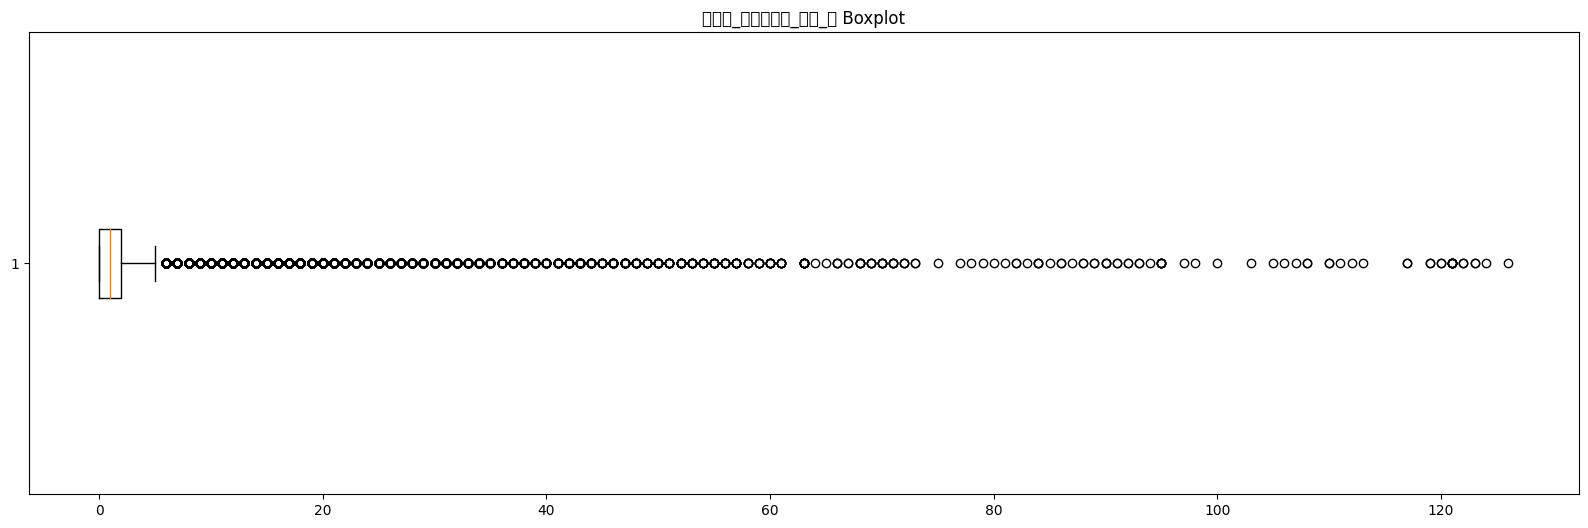

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

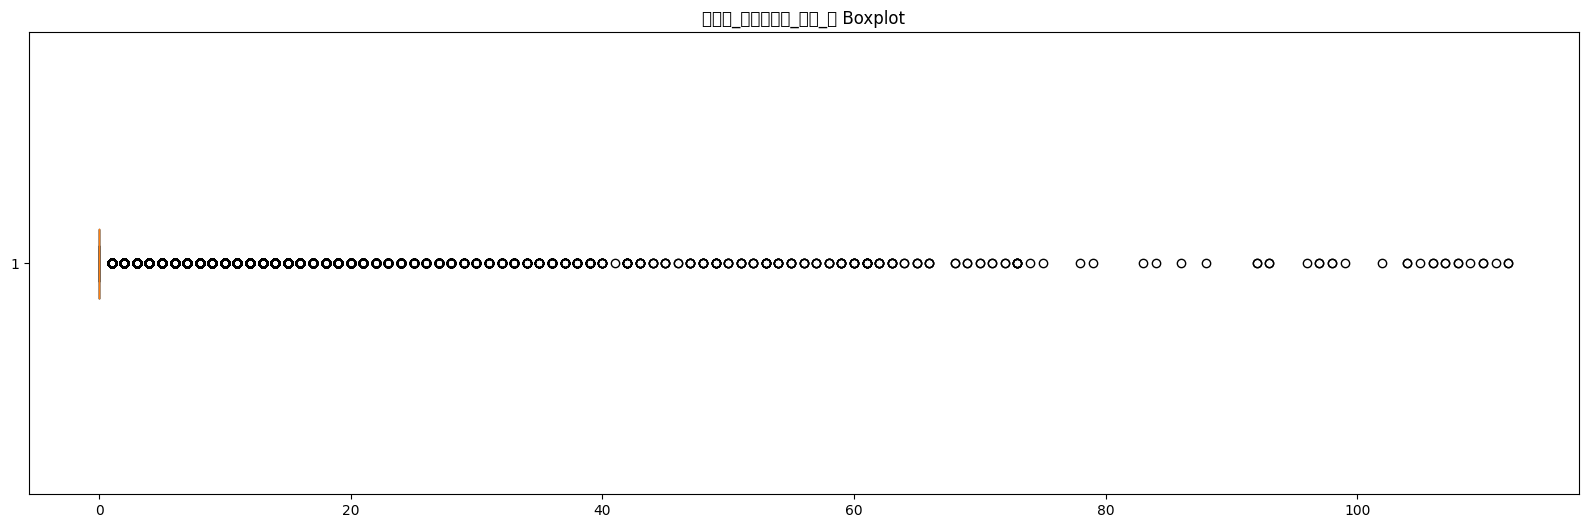

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

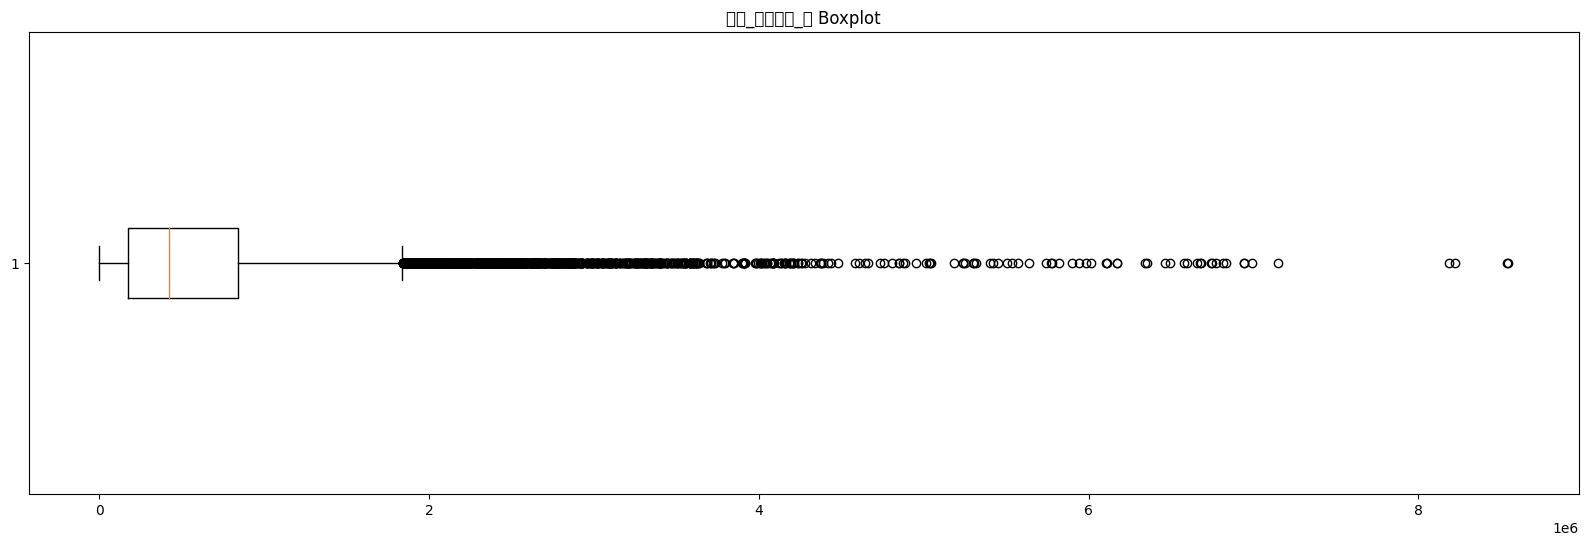

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

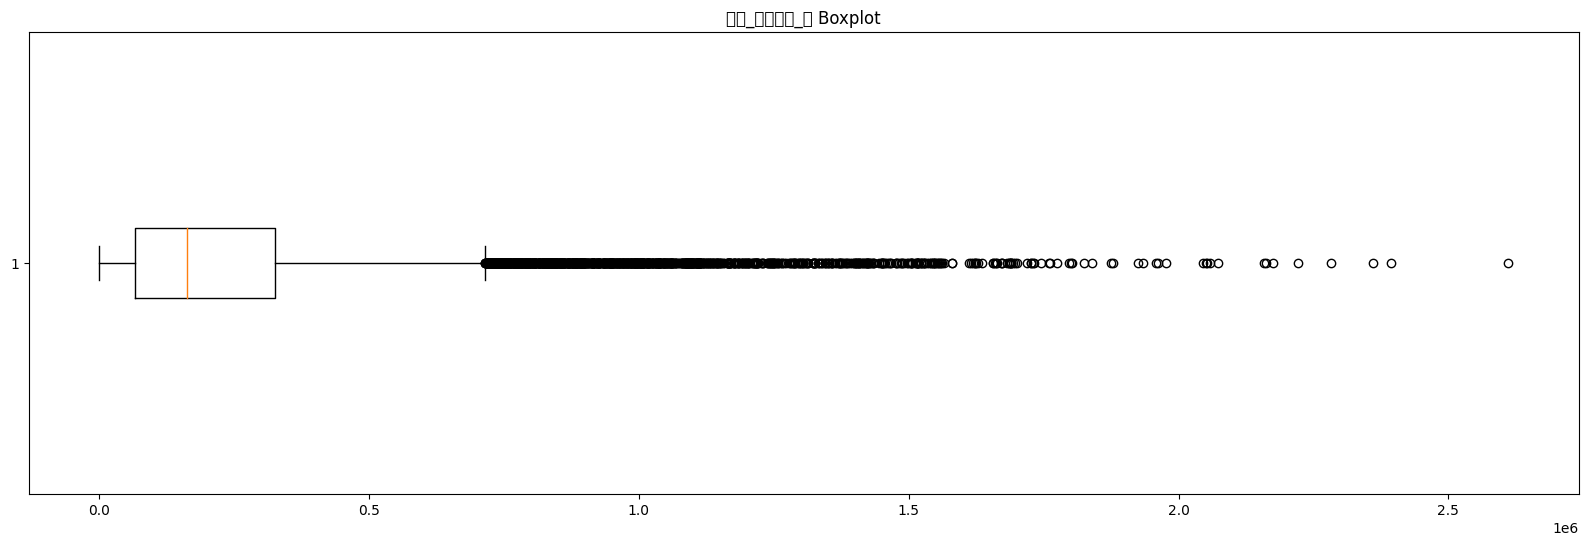

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

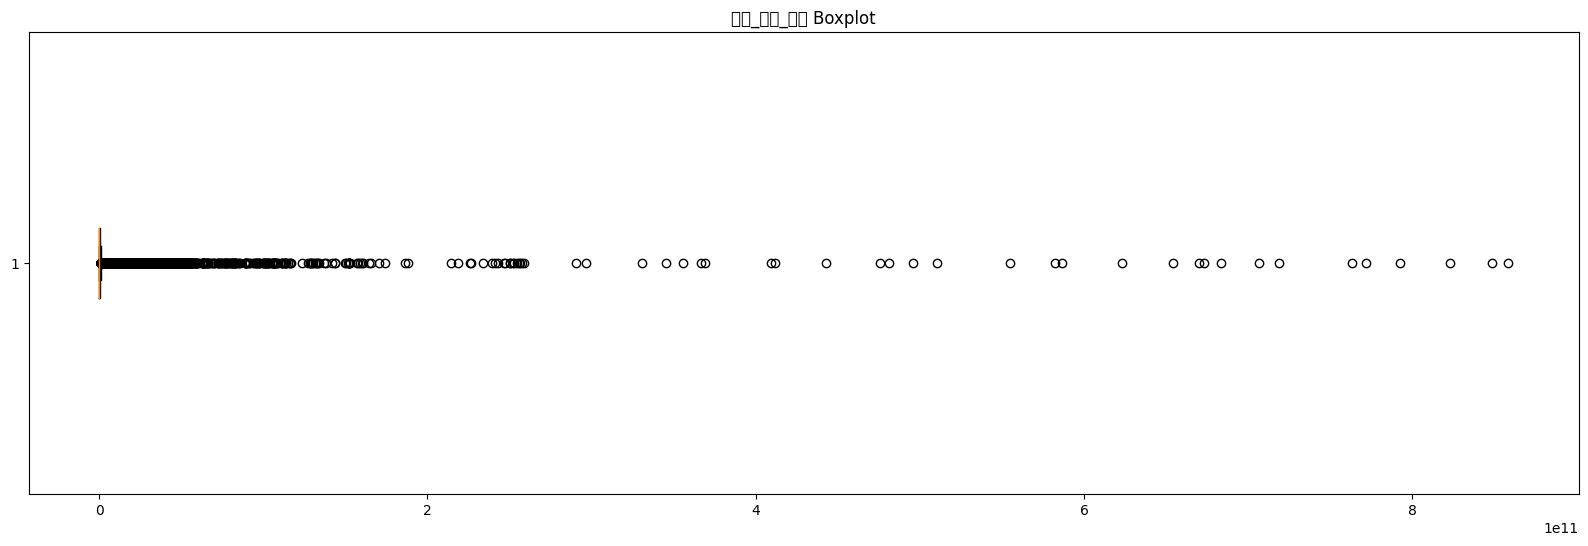

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

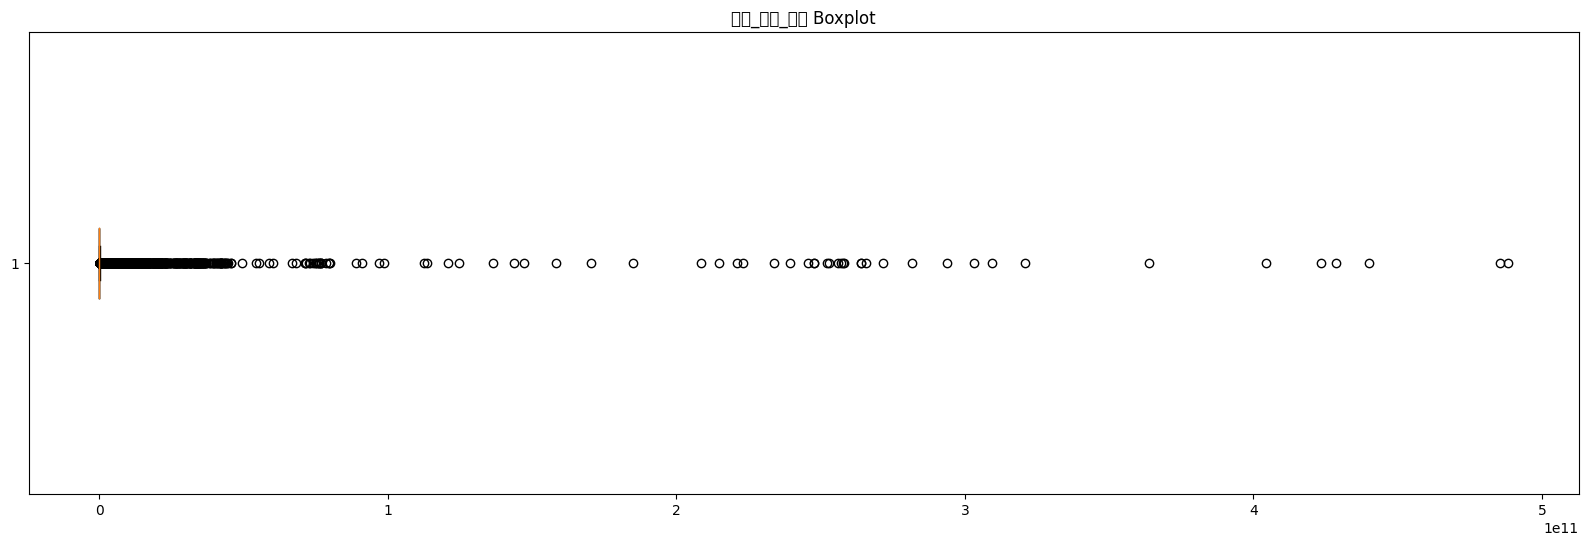

In [39]:
cleaned_data = column_a.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('음식점_프랜차이즈_점포_수 Boxplot')
plt.show()

cleaned_data = column_b.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('소매업_프랜차이즈_점포_수 Boxplot')
plt.show()

cleaned_data = column_c.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('평일_유동인구_수 Boxplot')
plt.show()

cleaned_data = column_d.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('주말_유동인구_수 Boxplot')
plt.show()

cleaned_data = column_e.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('주중_매출_금액 Boxplot')
plt.show()

cleaned_data = column_f.dropna()
plt.figure(figsize=(20, 6))
plt.boxplot(cleaned_data, vert=False)  # 수평 박스플롯
plt.title('주말_매출_금액 Boxplot')
plt.show()

In [40]:

money.transpose()

,0,1,2,3,4,5,6,7,8,9,...,83563,83564,83565,83566,83567,83568,83569,83570,83571,83572
기준_년분기_코드,20191,20191,20191,20191,20191,20191,20191,20191,20191,20191,...,20224,20224,20224,20224,20224,20224,20224,20224,20224,20224
상권_구분_코드,D,U,A,A,A,D,R,A,D,A,...,D,R,A,D,A,R,A,A,A,D
상권_구분_코드_명,발달상권,관광특구,골목상권,골목상권,골목상권,발달상권,전통시장,골목상권,발달상권,골목상권,...,발달상권,전통시장,골목상권,발달상권,골목상권,전통시장,골목상권,골목상권,골목상권,발달상권
상권_코드,3120037,3001492,3110085,3110166,3110161,3120072,3130147,3110438,3120158,3110850,...,3120024,3130182,3110591,3120056,3110043,3130051,3110121,3110163,3110110,3120065
상권_코드_명,동대문역사문화공원역,명동 남대문 북창동 다동 무교동 관광특구,경리단길남측,구의1동주민센터,중곡역 3번,성신여대,쌍문역동측상점가,경춘선숲길 우측,녹두거리(대학동),사당역 10번,...,회현역,영천시장,충정로역 6번,구의역,충무초등학교,동화동 골목형상점가,한양대역 4번,성자초등학교,상왕십리역 6번,회기역
서비스_업종_코드,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,CS200029,...,CS100010,CS200001,CS100010,CS100010,CS100010,CS100010,CS100010,CS100010,CS100010,CS100010
서비스_업종_코드_명,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,네일숍,...,커피-음료,일반교습학원,커피-음료,커피-음료,커피-음료,커피-음료,커피-음료,커피-음료,커피-음료,커피-음료
당월_매출_금액,20393290,73147711,3000000,8443798,20756990,122719691,11384929,3542727,27950110,25952543,...,663360129,3287672,23208485,717270334,126493832,74566607,496341232,60999234,35826724,340596205
당월_매출_건수,208,2136,40,153,305,1931,173,55,380,548,...,45590,16,5104,111612,22085,11618,74976,10668,4681,67496
주중_매출_금액,17051978,57025458,2337081,4984275,16694436,89162313,9896703,2448866,14764854,18495846,...,559002499,1643836,18042474,515200032,108671002,46002960,343713652,39994099,17309483,206793777


In [41]:
food_isang = food[food['상권_코드'] == 3001492]
food_isang
food_isang.to_csv('food_isang.csv')

In [42]:
# # 음식점 프랜차이즈 점포수가 float형식이므로 int형으로 바꿔주기
# food_fran['음식점_프랜차이즈_점포_수'] = food_fran['음식점_프랜차이즈_점포_수'].astype('Int64')
# food_fran.info()

In [43]:
# columns_to_plot = ['음식점_프랜차이즈_점포_수','소매업_프랜차이즈_점포_수']

# # plt.figure(figsize=(10, 8))
# sns.boxplot(data=food_fran_somae[columns_to_plot])
# plt.xticks(rotation=90)

# plt.title('이상치 확인 boxplot')

# plt.show()

In [44]:
# columns_to_plot = ['청년층_유동인구_수','중년층_유동인구_수','음식점_프랜차이즈_점포_수','소매업_프랜차이즈_점포_수','개업_점포_수','폐업_점포_수','주중_매출_건수','주말_매출_건수']

# # plt.figure(figsize=(10, 8))
# sns.boxplot(data=df[columns_to_plot])
# plt.xticks(rotation=90)

# plt.title('이상치 확인 boxplot')

# plt.show()

In [45]:
moving_people

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,...,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,청년층_유동인구_수,중년층_유동인구_수,평일_유동인구_수,주말_유동인구_수
4947,20224,U,관광특구,3001496,강남 마이스 관광특구,113561,56267,57295,8423,23526,...,17220,18047,18597,18288,13967,12091,54809,39789,87501,26058
4948,20224,U,관광특구,3001495,잠실 관광특구,4179934,2015767,2164168,490222,895245,...,588228,595830,598401,615406,633869,576473,1892032,1210377,2969593,1210342
4949,20224,U,관광특구,3001494,종로?청계 관광특구,8657826,4693188,3964638,334742,1500979,...,1381468,1386192,1396528,1396973,1047401,776808,3139198,3174579,6833618,1824209
4950,20224,U,관광특구,3001493,동대문패션타운 관광특구,3418870,1617046,1801825,182494,618819,...,540938,546081,547095,512377,377450,374347,1437102,1189746,2667073,751797
4951,20224,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,7629595,3717728,3911867,365427,1301955,...,1241705,1251450,1267499,1240066,864591,661235,3140989,2884134,6103768,1525826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31341,20191,A,골목상권,3110005,세검정,129171,55368,73803,19624,15305,...,18746,18727,18736,18576,17782,17918,31449,41912,93471,35700
31342,20191,A,골목상권,3110004,대신고등학교,495628,226246,269381,94335,57494,...,70158,71562,71577,70647,70556,71236,116874,146307,353836,141792
31343,20191,A,골목상권,3110003,세검정초등학교,706686,310470,396215,128431,82037,...,100429,100067,99815,98912,102760,103921,155842,221079,500006,206681
31344,20191,A,골목상권,3110002,독립문역 1번,540585,246868,293717,96885,65609,...,77283,79044,78826,78583,75041,75508,123011,162598,390037,150549


In [46]:
# 서울 총 유동인구수(A)와 서울 청년층 유동인구수(B)를 계산합니다.
total_population_A = moving_people['총_유동인구_수'].sum()
young_population_B = moving_people['청년층_유동인구_수'].sum()

# '상권_코드_명'으로 그룹화하여 각 상권별 청년층 유동인구수(C)와 총 유동인구수(D)를 계산합니다.
grouped = moving_people.groupby('상권_코드_명').agg({
    '청년층_유동인구_수': 'sum',
    '총_유동인구_수': 'sum'
}).rename(columns={'청년층_유동인구_수': 'C', '총_유동인구_수': 'D'})

# 각 상권별 LQ 지수를 계산하고 결과를 저장합니다.
grouped['LQ_청년층_유동인구'] = (grouped['C'] / grouped['D']) / (young_population_B / total_population_A)

# 결과를 출력합니다.
grouped

,C,D,LQ_청년층_유동인구
상권_코드_명,,,
4.19민주묘지역 2번,2672101,9026057,0.847688
63빌딩,293037,902287,0.929949
DMC(디지털미디어시티),4087950,8541978,1.370341
GS강동자이아파트,3544908,15279444,0.664322
G타워,3171740,5234546,1.735002
...,...,...,...
후암시장,1075297,3432864,0.896919
휘문고교사거리,2032081,4934330,1.179219
흑리단길,971131,3422503,0.812485


In [47]:
# 서울 총 유동인구수(A)와 서울 남성층 유동인구수(B)를 계산합니다.
total_population_A = moving_people['총_유동인구_수'].sum()
old_population_B = moving_people['중년층_유동인구_수'].sum()

# '상권_코드_명'으로 그룹화하여 각 상권별 남성층 유동인구수(C)와 총 유동인구수(D)를 계산합니다.
grouped1 = moving_people.groupby('상권_코드_명').agg({
    '중년층_유동인구_수': 'sum',
    '총_유동인구_수': 'sum'
}).rename(columns={'중년층_유동인구_수': 'C', '총_유동인구_수': 'D'})

# 각 상권별 LQ 지수를 계산하고 결과를 저장합니다.
grouped1['LQ_중년층_유동인구'] = (grouped1['C'] / grouped1['D']) / (old_population_B / total_population_A)

# 결과를 출력합니다.
grouped1

,C,D,LQ_중년층_유동인구
상권_코드_명,,,
4.19민주묘지역 2번,2507733,9026057,0.913809
63빌딩,308639,902287,1.125067
DMC(디지털미디어시티),2833779,8541978,1.091138
GS강동자이아파트,4590813,15279444,0.988222
G타워,1397071,5234546,0.877833
...,...,...,...
후암시장,1137052,3432864,1.089422
휘문고교사거리,1626096,4934330,1.083903
흑리단길,1098307,3422503,1.055485


###음식점_개폐업_점포수_젠트리피케이션지수



In [48]:
food_fran_somae

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,음식점_프랜차이즈_점포_수,소매업_프랜차이즈_점포_수
0,20191,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0,<NA>,0
1,20191,D,발달상권,3120165,서래마을카페거리(서래마을),CS100007,치킨전문점,0,1,0,0,100,1,1,1,<NA>
2,20191,D,발달상권,3120177,신논현역 1번,CS300015,가방,3,3,0,0,0,0,0,<NA>,0
3,20191,A,골목상권,3110508,서연중학교,CS200041,사진관,6,6,17,1,0,0,0,<NA>,0
4,20191,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,2,2,0,0,0,0,0,<NA>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207977,20224,A,골목상권,3110631,방화초등학교,CS200038,독서실,0,0,0,0,0,1,0,<NA>,0
1207978,20224,A,골목상권,3110954,국기원,CS200010,변호사사무소,0,0,0,0,0,1,0,<NA>,0
1207979,20224,A,골목상권,3110687,"천왕역 3번(오류2동주민센터, 서울오류남초등학교)",CS100008,분식전문점,0,0,0,0,0,1,0,0,<NA>
1207980,20224,R,전통시장,3130054,황학동주방가구거리상점가,CS200034,여관,0,0,0,0,0,1,0,<NA>,0


In [49]:
# 'CS1'로 시작하는 '서비스_업종_코드'를 필터링하여 인덱스를 구합니다.
cs1_indices = food_fran_somae['서비스_업종_코드'].str.startswith('CS1')

# '음식점_개폐업_점포_수' 열을 추가합니다. 'CS1'로 시작하지 않는 경우 NA 값을 할당합니다.
food_fran_somae.loc[cs1_indices, '음식점_개폐업_점포_수'] = food_fran_somae.loc[cs1_indices, '개업_점포_수'] + food_fran_somae.loc[cs1_indices, '폐업_점포_수']
food_fran_somae.loc[~cs1_indices, '음식점_개폐업_점포_수'] = pd.NA

# 'CS1'로 시작하지 않는 행들에 대해 '개업_점포_수'와 '폐업_점포_수'를 합하여
# '소매업_개폐업_점포_수'라는 새로운 열을 추가합니다.
food_fran_somae.loc[~cs1_indices, '소매업_개폐업_점포_수'] = (
    food_fran_somae.loc[~cs1_indices, '개업_점포_수'] + food_fran_somae.loc[~cs1_indices, '폐업_점포_수']
)

# 'CS1'로 시작하는 행들에 대해서는 '소매업_개폐업_점포_수' 열에 NA 값을 할당합니다.
food_fran_somae.loc[cs1_indices, '소매업_개폐업_점포_수'] = pd.NA

In [50]:
food_fran_somae

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,음식점_프랜차이즈_점포_수,소매업_프랜차이즈_점포_수,음식점_개폐업_점포_수,소매업_개폐업_점포_수
0,20191,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0,<NA>,0,NaN,1.0
1,20191,D,발달상권,3120165,서래마을카페거리(서래마을),CS100007,치킨전문점,0,1,0,0,100,1,1,1,<NA>,1.0,NaN
2,20191,D,발달상권,3120177,신논현역 1번,CS300015,가방,3,3,0,0,0,0,0,<NA>,0,NaN,0.0
3,20191,A,골목상권,3110508,서연중학교,CS200041,사진관,6,6,17,1,0,0,0,<NA>,0,NaN,1.0
4,20191,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,2,2,0,0,0,0,0,<NA>,0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207977,20224,A,골목상권,3110631,방화초등학교,CS200038,독서실,0,0,0,0,0,1,0,<NA>,0,NaN,1.0
1207978,20224,A,골목상권,3110954,국기원,CS200010,변호사사무소,0,0,0,0,0,1,0,<NA>,0,NaN,1.0
1207979,20224,A,골목상권,3110687,"천왕역 3번(오류2동주민센터, 서울오류남초등학교)",CS100008,분식전문점,0,0,0,0,0,1,0,0,<NA>,1.0,NaN
1207980,20224,R,전통시장,3130054,황학동주방가구거리상점가,CS200034,여관,0,0,0,0,0,1,0,<NA>,0,NaN,1.0


In [51]:
# '기준_년_분기_코드' 열의 값이 정수형이며 '2019'로 시작하는 데이터를 필터링합니다.
data_2019 = food_fran_somae[food_fran_somae['기준_년분기_코드'].astype(str).str.startswith('2019')]
# 각 상권별로 합계를 계산합니다.
grouped_2019 = data_2019.groupby('상권_코드_명')['음식점_개폐업_점포_수'].sum().reset_index()
# 전체 합계를 계산합니다.
total_2019 = data_2019['음식점_개폐업_점포_수'].sum()
# LQ를 계산합니다. 이 때 전체 합계가 0이면 분모가 0이 되므로, 분모가 0인 경우를 처리해야 합니다.
grouped_2019['LQ'] = grouped_2019['음식점_개폐업_점포_수'] / total_2019 if total_2019 != 0 else 0

# 2022년 데이터 필터링
data_2022 = food_fran_somae[food_fran_somae['기준_년분기_코드'].astype(str).str.startswith('2022')]
grouped_2022 = data_2022.groupby('상권_코드_명')['음식점_개폐업_점포_수'].sum().reset_index()
total_2022 = data_2022['음식점_개폐업_점포_수'].sum()
grouped_2022['LQ'] = grouped_2022['음식점_개폐업_점포_수'] / total_2022 if total_2022 != 0 else 0



In [52]:
grouped_2019

,상권_코드_명,음식점_개폐업_점포_수,LQ
0,4.19민주묘지역 2번,22.0,0.000503
1,63빌딩,16.0,0.000366
2,DMC(디지털미디어시티),208.0,0.004752
3,GS강동자이아파트,9.0,0.000206
4,G타워,4.0,0.000091
...,...,...,...
1643,후암시장,10.0,0.000228
1644,휘문고교사거리,5.0,0.000114
1645,흑리단길,27.0,0.000617
1646,흑석2치안센터,1.0,0.000023


In [53]:
grouped_2022

,상권_코드_명,음식점_개폐업_점포_수,LQ
0,4.19민주묘지역 2번,12.0,0.000344
1,63빌딩,2.0,0.000057
2,DMC(디지털미디어시티),120.0,0.003444
3,GS강동자이아파트,12.0,0.000344
4,G타워,9.0,0.000258
...,...,...,...
1643,후암시장,1.0,0.000029
1644,휘문고교사거리,8.0,0.000230
1645,흑리단길,19.0,0.000545
1646,흑석2치안센터,0.0,0.000000


In [54]:
# 두 데이터프레임 병합
merged_data = pd.merge(grouped_2019, grouped_2022, on='상권_코드_명', suffixes=('_2019', '_2022'))
# LQ 지수 차이 계산
merged_data['LQ 변화량 2019-2022'] = merged_data['LQ_2022'] - merged_data['LQ_2019']
# 결과 확인
merged_data[['상권_코드_명', 'LQ 변화량 2019-2022']]

# 양수 : 2022 활발, 음수 : 2019가 더 활발한 개폐업..!

,상권_코드_명,LQ 변화량 2019-2022
0,4.19민주묘지역 2번,-0.000158
1,63빌딩,-0.000308
2,DMC(디지털미디어시티),-0.001308
3,GS강동자이아파트,0.000139
4,G타워,0.000167
...,...,...
1643,후암시장,-0.000200
1644,휘문고교사거리,0.000115
1645,흑리단길,-0.000072
1646,흑석2치안센터,-0.000023


In [55]:
lq_change_final= pd.merge(merged_data, commer_district, on=['상권_코드_명'], how='outer' )
lq_change_final

,상권_코드_명,음식점_개폐업_점포_수_2019,LQ_2019,음식점_개폐업_점포_수_2022,LQ_2022,LQ 변화량 2019-2022,상권_구분_코드,상권_구분_코드_명,상권_코드,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
0,4.19민주묘지역 2번,22.0,0.000503,12.0,0.000344,-0.000158,A,골목상권,3110346.0,201112.0,461090.0,11305.0,강북구,11305645.0,우이동,60794.0
1,63빌딩,16.0,0.000366,2.0,0.000057,-0.000308,D,발달상권,3120150.0,194670.0,446691.0,11560.0,영등포구,11560540.0,여의동,40709.0
2,DMC(디지털미디어시티),208.0,0.004752,120.0,0.003444,-0.001308,D,발달상권,3120098.0,190266.0,453378.0,11440.0,마포구,11440740.0,상암동,347758.0
3,GS강동자이아파트,9.0,0.000206,12.0,0.000344,0.000139,A,골목상권,3111083.0,213004.0,448764.0,11740.0,강동구,11740685.0,길동,81524.0
4,G타워,4.0,0.000091,9.0,0.000258,0.000167,A,골목상권,3110722.0,190905.0,442315.0,11530.0,구로구,11530540.0,구로3동,84987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,흑석2치안센터,1.0,0.000023,0.0,0.000000,-0.000023,A,골목상권,3110844.0,197209.0,445122.0,11590.0,동작구,11590605.0,흑석동,25007.0
1647,흑석시장,9.0,0.000206,1.0,0.000029,-0.000177,R,전통시장,3130270.0,196718.0,445267.0,11590.0,동작구,11590605.0,흑석동,2989.0
1648,양남시장,NaN,NaN,NaN,NaN,NaN,R,전통시장,3130239.0,190381.0,447047.0,11560.0,영등포구,11560610.0,양평1동,2975.0
1649,동대문상가B동,NaN,NaN,NaN,NaN,NaN,R,전통시장,3130016.0,201060.0,452267.0,11110.0,종로구,11110670.0,창신1동,4841.0


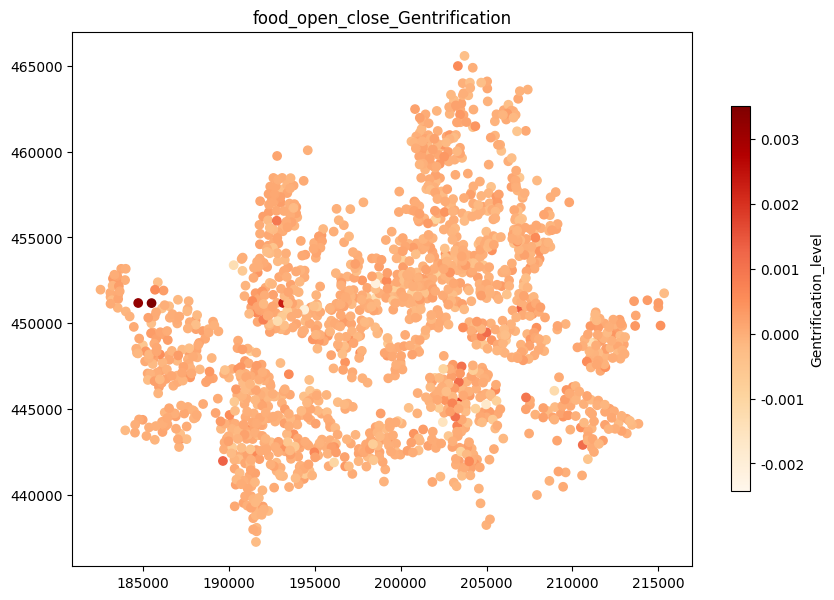

In [56]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
#plt.rcParams['font.family'] = 'NanumBarunGothic'

# 데이터 프레임에서 좌표 데이터를 Point 객체로 변환
lq_change_final['geometry'] = lq_change_final.apply(
    lambda row: Point(row['엑스좌표_값'], row['와이좌표_값']), axis=1
)
geo_data = gpd.GeoDataFrame(lq_change_final, geometry='geometry')

# 데이터 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geo_data.plot(column='LQ 변화량 2019-2022', ax=ax, legend=True, cmap='OrRd',
legend_kwds={'label': "Gentrification_level", 'shrink': 0.5})
plt.title('food_open_close_Gentrification')
plt.show()

##소매업_개폐업_점포수_젠트리피케이션

In [57]:
# '기준_년_분기_코드' 열의 값이 정수형이며 '2019'로 시작하는 데이터를 필터링합니다.
data_2019 = food_fran_somae[food_fran_somae['기준_년분기_코드'].astype(str).str.startswith('2019')]
# 각 상권별로 합계를 계산합니다.
grouped_2019 = data_2019.groupby('상권_코드_명')['소매업_개폐업_점포_수'].sum().reset_index()
# 전체 합계를 계산합니다.
total_2019 = data_2019['소매업_개폐업_점포_수'].sum()
# LQ를 계산합니다. 이 때 전체 합계가 0이면 분모가 0이 되므로, 분모가 0인 경우를 처리해야 합니다.
grouped_2019['LQ'] = grouped_2019['소매업_개폐업_점포_수'] / total_2019 if total_2019 != 0 else 0

# 2022년 데이터 필터링
data_2022 = food_fran_somae[food_fran_somae['기준_년분기_코드'].astype(str).str.startswith('2022')]
grouped_2022 = data_2022.groupby('상권_코드_명')['소매업_개폐업_점포_수'].sum().reset_index()
total_2022 = data_2022['소매업_개폐업_점포_수'].sum()
grouped_2022['LQ'] = grouped_2022['소매업_개폐업_점포_수'] / total_2022 if total_2022 != 0 else 0


In [58]:
grouped_2019

,상권_코드_명,소매업_개폐업_점포_수,LQ
0,4.19민주묘지역 2번,15.0,0.000181
1,63빌딩,34.0,0.000411
2,DMC(디지털미디어시티),112.0,0.001353
3,GS강동자이아파트,32.0,0.000386
4,G타워,11.0,0.000133
...,...,...,...
1643,후암시장,22.0,0.000266
1644,휘문고교사거리,19.0,0.000229
1645,흑리단길,32.0,0.000386
1646,흑석2치안센터,5.0,0.000060


In [59]:
grouped_2022

,상권_코드_명,소매업_개폐업_점포_수,LQ
0,4.19민주묘지역 2번,3.0,0.000059
1,63빌딩,22.0,0.000435
2,DMC(디지털미디어시티),49.0,0.000969
3,GS강동자이아파트,26.0,0.000514
4,G타워,12.0,0.000237
...,...,...,...
1643,후암시장,14.0,0.000277
1644,휘문고교사거리,13.0,0.000257
1645,흑리단길,22.0,0.000435
1646,흑석2치안센터,3.0,0.000059


In [60]:
# 두 데이터프레임 병합
merged_data = pd.merge(grouped_2019, grouped_2022, on='상권_코드_명', suffixes=('_2019', '_2022'))
# LQ 지수 차이 계산
merged_data['LQ 변화량 2019-2022'] = merged_data['LQ_2022'] - merged_data['LQ_2019']
# 결과 확인
merged_data[['상권_코드_명', 'LQ 변화량 2019-2022']]

,상권_코드_명,LQ 변화량 2019-2022
0,4.19민주묘지역 2번,-0.000122
1,63빌딩,0.000024
2,DMC(디지털미디어시티),-0.000384
3,GS강동자이아파트,0.000128
4,G타워,0.000104
...,...,...
1643,후암시장,0.000011
1644,휘문고교사거리,0.000028
1645,흑리단길,0.000048
1646,흑석2치안센터,-0.000001


In [61]:
lq_change_final= pd.merge(merged_data, commer_district, on=['상권_코드_명'], how='outer' )
lq_change_final

,상권_코드_명,소매업_개폐업_점포_수_2019,LQ_2019,소매업_개폐업_점포_수_2022,LQ_2022,LQ 변화량 2019-2022,상권_구분_코드,상권_구분_코드_명,상권_코드,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
0,4.19민주묘지역 2번,15.0,0.000181,3.0,0.000059,-0.000122,A,골목상권,3110346.0,201112.0,461090.0,11305.0,강북구,11305645.0,우이동,60794.0
1,63빌딩,34.0,0.000411,22.0,0.000435,0.000024,D,발달상권,3120150.0,194670.0,446691.0,11560.0,영등포구,11560540.0,여의동,40709.0
2,DMC(디지털미디어시티),112.0,0.001353,49.0,0.000969,-0.000384,D,발달상권,3120098.0,190266.0,453378.0,11440.0,마포구,11440740.0,상암동,347758.0
3,GS강동자이아파트,32.0,0.000386,26.0,0.000514,0.000128,A,골목상권,3111083.0,213004.0,448764.0,11740.0,강동구,11740685.0,길동,81524.0
4,G타워,11.0,0.000133,12.0,0.000237,0.000104,A,골목상권,3110722.0,190905.0,442315.0,11530.0,구로구,11530540.0,구로3동,84987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,흑석2치안센터,5.0,0.000060,3.0,0.000059,-0.000001,A,골목상권,3110844.0,197209.0,445122.0,11590.0,동작구,11590605.0,흑석동,25007.0
1647,흑석시장,4.0,0.000048,3.0,0.000059,0.000011,R,전통시장,3130270.0,196718.0,445267.0,11590.0,동작구,11590605.0,흑석동,2989.0
1648,양남시장,NaN,NaN,NaN,NaN,NaN,R,전통시장,3130239.0,190381.0,447047.0,11560.0,영등포구,11560610.0,양평1동,2975.0
1649,동대문상가B동,NaN,NaN,NaN,NaN,NaN,R,전통시장,3130016.0,201060.0,452267.0,11110.0,종로구,11110670.0,창신1동,4841.0


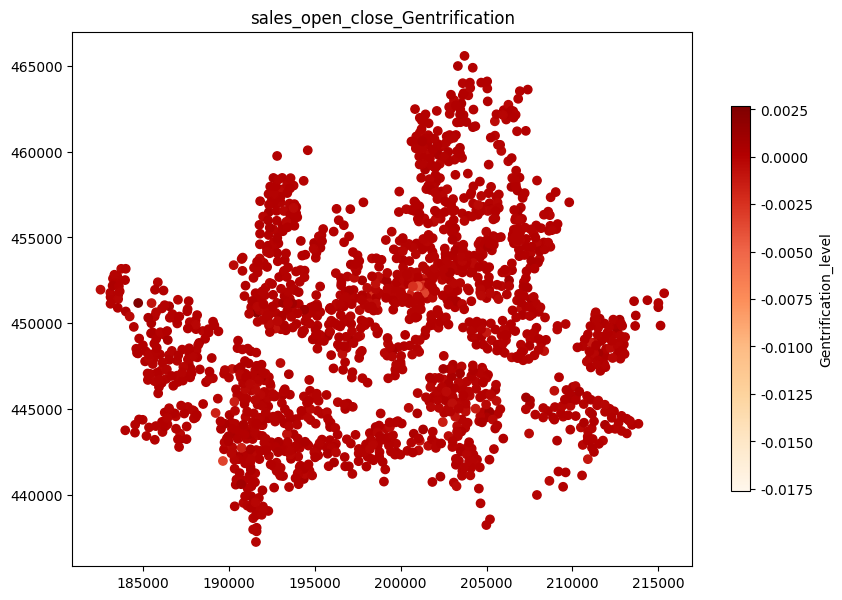

In [62]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
#plt.rcParams['font.family'] = 'NanumBarunGothic'

# 데이터 프레임에서 좌표 데이터를 Point 객체로 변환
lq_change_final['geometry'] = lq_change_final.apply(
    lambda row: Point(row['엑스좌표_값'], row['와이좌표_값']), axis=1
)
geo_data = gpd.GeoDataFrame(lq_change_final, geometry='geometry')

# 데이터 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geo_data.plot(column='LQ 변화량 2019-2022', ax=ax, legend=True, cmap='OrRd',
legend_kwds={'label': "Gentrification_level", 'shrink': 0.5})
plt.title('sales_open_close_Gentrification')
plt.show()

##음식점_프랜차이즈_점포_수_젠트리피케이션

In [63]:
# 2019년 데이터 필터링
data_2019 = food_fran_somae[food_fran_somae['기준_년분기_코드'].astype(str).str.startswith('2019')]
grouped_2019 = data_2019.groupby('상권_코드_명')['음식점_프랜차이즈_점포_수'].sum().reset_index()
total_2019 = data_2019['음식점_프랜차이즈_점포_수'].sum()
grouped_2019['LQ'] = grouped_2019['음식점_프랜차이즈_점포_수'] / total_2019 if total_2019 != 0 else 0

# 2022년 데이터 필터링
data_2022 = food_fran_somae[food_fran_somae['기준_년분기_코드'].astype(str).str.startswith('2022')]
grouped_2022 = data_2022.groupby('상권_코드_명')['음식점_프랜차이즈_점포_수'].sum().reset_index()
total_2022 = data_2022['음식점_프랜차이즈_점포_수'].sum()
grouped_2022['LQ'] = grouped_2022['음식점_프랜차이즈_점포_수'] / total_2022 if total_2022 != 0 else 0


In [64]:
grouped_2019

,상권_코드_명,음식점_프랜차이즈_점포_수,LQ
0,4.19민주묘지역 2번,39,0.000459
1,63빌딩,28,0.000329
2,DMC(디지털미디어시티),439,0.005166
3,GS강동자이아파트,32,0.000377
4,G타워,13,0.000153
...,...,...,...
1643,후암시장,10,0.000118
1644,휘문고교사거리,12,0.000141
1645,흑리단길,24,0.000282
1646,흑석2치안센터,0,0.0


In [65]:
grouped_2022

,상권_코드_명,음식점_프랜차이즈_점포_수,LQ
0,4.19민주묘지역 2번,41,0.000504
1,63빌딩,40,0.000491
2,DMC(디지털미디어시티),469,0.00576
3,GS강동자이아파트,40,0.000491
4,G타워,52,0.000639
...,...,...,...
1643,후암시장,12,0.000147
1644,휘문고교사거리,13,0.00016
1645,흑리단길,24,0.000295
1646,흑석2치안센터,0,0.0


In [66]:
# 두 데이터프레임 병합
merged_data = pd.merge(grouped_2019, grouped_2022, on='상권_코드_명', suffixes=('_2019', '_2022'))
# LQ 지수 차이 계산
merged_data['LQ 변화량 2019-2022'] = merged_data['LQ_2022'] - merged_data['LQ_2019']
# 결과 확인
merged_data[['상권_코드_명', 'LQ 변화량 2019-2022']]

,상권_코드_명,LQ 변화량 2019-2022
0,4.19민주묘지역 2번,0.000045
1,63빌딩,0.000162
2,DMC(디지털미디어시티),0.000595
3,GS강동자이아파트,0.000115
4,G타워,0.000486
...,...,...
1643,후암시장,0.00003
1644,휘문고교사거리,0.000018
1645,흑리단길,0.000012
1646,흑석2치안센터,0.0


In [67]:
lq_change_final= pd.merge(merged_data, commer_district, on=['상권_코드_명'], how='outer' )
lq_change_final

,상권_코드_명,음식점_프랜차이즈_점포_수_2019,LQ_2019,음식점_프랜차이즈_점포_수_2022,LQ_2022,LQ 변화량 2019-2022,상권_구분_코드,상권_구분_코드_명,상권_코드,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
0,4.19민주묘지역 2번,39,0.000459,41,0.000504,0.000045,A,골목상권,3110346.0,201112.0,461090.0,11305.0,강북구,11305645.0,우이동,60794.0
1,63빌딩,28,0.000329,40,0.000491,0.000162,D,발달상권,3120150.0,194670.0,446691.0,11560.0,영등포구,11560540.0,여의동,40709.0
2,DMC(디지털미디어시티),439,0.005166,469,0.00576,0.000595,D,발달상권,3120098.0,190266.0,453378.0,11440.0,마포구,11440740.0,상암동,347758.0
3,GS강동자이아파트,32,0.000377,40,0.000491,0.000115,A,골목상권,3111083.0,213004.0,448764.0,11740.0,강동구,11740685.0,길동,81524.0
4,G타워,13,0.000153,52,0.000639,0.000486,A,골목상권,3110722.0,190905.0,442315.0,11530.0,구로구,11530540.0,구로3동,84987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,흑석2치안센터,0,0.0,0,0.0,0.0,A,골목상권,3110844.0,197209.0,445122.0,11590.0,동작구,11590605.0,흑석동,25007.0
1647,흑석시장,0,0.0,4,0.000049,0.000049,R,전통시장,3130270.0,196718.0,445267.0,11590.0,동작구,11590605.0,흑석동,2989.0
1648,양남시장,<NA>,<NA>,<NA>,<NA>,<NA>,R,전통시장,3130239.0,190381.0,447047.0,11560.0,영등포구,11560610.0,양평1동,2975.0
1649,동대문상가B동,<NA>,<NA>,<NA>,<NA>,<NA>,R,전통시장,3130016.0,201060.0,452267.0,11110.0,종로구,11110670.0,창신1동,4841.0


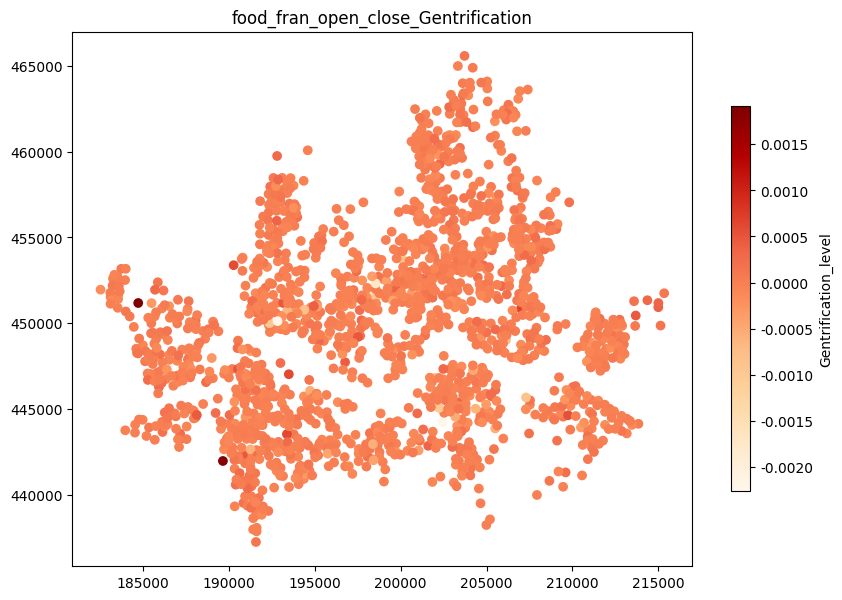

In [68]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
#plt.rcParams['font.family'] = 'NanumBarunGothic'

# 데이터 프레임에서 좌표 데이터를 Point 객체로 변환
lq_change_final['geometry'] = lq_change_final.apply(
    lambda row: Point(row['엑스좌표_값'], row['와이좌표_값']), axis=1
)
geo_data = gpd.GeoDataFrame(lq_change_final, geometry='geometry')

# 데이터 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geo_data.plot(column='LQ 변화량 2019-2022', ax=ax, legend=True, cmap='OrRd',
legend_kwds={'label': "Gentrification_level", 'shrink': 0.5})
plt.title('food_fran_open_close_Gentrification')
plt.show()

##소매업_프랜차이즈_점포_수_젠트리피케이션





In [69]:
# 2019년 데이터 필터링
data_2019 = food_fran_somae[food_fran_somae['기준_년분기_코드'].astype(str).str.startswith('2019')]
grouped_2019 = data_2019.groupby('상권_코드_명')['소매업_프랜차이즈_점포_수'].sum().reset_index()
total_2019 = data_2019['소매업_프랜차이즈_점포_수'].sum()
grouped_2019['LQ'] = grouped_2019['소매업_프랜차이즈_점포_수'] / total_2019 if total_2019 != 0 else 0

# 2022년 데이터 필터링
data_2022 = food_fran_somae[food_fran_somae['기준_년분기_코드'].astype(str).str.startswith('2022')]
grouped_2022 = data_2022.groupby('상권_코드_명')['소매업_프랜차이즈_점포_수'].sum().reset_index()
total_2022 = data_2022['소매업_프랜차이즈_점포_수'].sum()
grouped_2022['LQ'] = grouped_2022['소매업_프랜차이즈_점포_수'] / total_2022 if total_2022 != 0 else 0


In [70]:
grouped_2019

,상권_코드_명,소매업_프랜차이즈_점포_수,LQ
0,4.19민주묘지역 2번,9,0.000153
1,63빌딩,10,0.00017
2,DMC(디지털미디어시티),157,0.00267
3,GS강동자이아파트,33,0.000561
4,G타워,31,0.000527
...,...,...,...
1643,후암시장,11,0.000187
1644,휘문고교사거리,29,0.000493
1645,흑리단길,44,0.000748
1646,흑석2치안센터,0,0.0


In [71]:
grouped_2022

,상권_코드_명,소매업_프랜차이즈_점포_수,LQ
0,4.19민주묘지역 2번,8,0.000137
1,63빌딩,12,0.000206
2,DMC(디지털미디어시티),160,0.002749
3,GS강동자이아파트,33,0.000567
4,G타워,36,0.000619
...,...,...,...
1643,후암시장,24,0.000412
1644,휘문고교사거리,36,0.000619
1645,흑리단길,40,0.000687
1646,흑석2치안센터,4,0.000069


In [72]:
# 두 데이터프레임 병합
merged_data = pd.merge(grouped_2019, grouped_2022, on='상권_코드_명', suffixes=('_2019', '_2022'))
# LQ 지수 차이 계산
merged_data['LQ 변화량 2019-2022'] = merged_data['LQ_2022'] - merged_data['LQ_2019']
# 결과 확인
merged_data[['상권_코드_명', 'LQ 변화량 2019-2022']]

,상권_코드_명,LQ 변화량 2019-2022
0,4.19민주묘지역 2번,-0.000016
1,63빌딩,0.000036
2,DMC(디지털미디어시티),0.000079
3,GS강동자이아파트,0.000006
4,G타워,0.000091
...,...,...
1643,후암시장,0.000225
1644,휘문고교사거리,0.000125
1645,흑리단길,-0.000061
1646,흑석2치안센터,0.000069


In [73]:
lq_change_final= pd.merge(merged_data, commer_district, on=['상권_코드_명'], how='outer' )
lq_change_final

,상권_코드_명,소매업_프랜차이즈_점포_수_2019,LQ_2019,소매업_프랜차이즈_점포_수_2022,LQ_2022,LQ 변화량 2019-2022,상권_구분_코드,상권_구분_코드_명,상권_코드,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
0,4.19민주묘지역 2번,9,0.000153,8,0.000137,-0.000016,A,골목상권,3110346.0,201112.0,461090.0,11305.0,강북구,11305645.0,우이동,60794.0
1,63빌딩,10,0.00017,12,0.000206,0.000036,D,발달상권,3120150.0,194670.0,446691.0,11560.0,영등포구,11560540.0,여의동,40709.0
2,DMC(디지털미디어시티),157,0.00267,160,0.002749,0.000079,D,발달상권,3120098.0,190266.0,453378.0,11440.0,마포구,11440740.0,상암동,347758.0
3,GS강동자이아파트,33,0.000561,33,0.000567,0.000006,A,골목상권,3111083.0,213004.0,448764.0,11740.0,강동구,11740685.0,길동,81524.0
4,G타워,31,0.000527,36,0.000619,0.000091,A,골목상권,3110722.0,190905.0,442315.0,11530.0,구로구,11530540.0,구로3동,84987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,흑석2치안센터,0,0.0,4,0.000069,0.000069,A,골목상권,3110844.0,197209.0,445122.0,11590.0,동작구,11590605.0,흑석동,25007.0
1647,흑석시장,8,0.000136,8,0.000137,0.000001,R,전통시장,3130270.0,196718.0,445267.0,11590.0,동작구,11590605.0,흑석동,2989.0
1648,양남시장,<NA>,<NA>,<NA>,<NA>,<NA>,R,전통시장,3130239.0,190381.0,447047.0,11560.0,영등포구,11560610.0,양평1동,2975.0
1649,동대문상가B동,<NA>,<NA>,<NA>,<NA>,<NA>,R,전통시장,3130016.0,201060.0,452267.0,11110.0,종로구,11110670.0,창신1동,4841.0


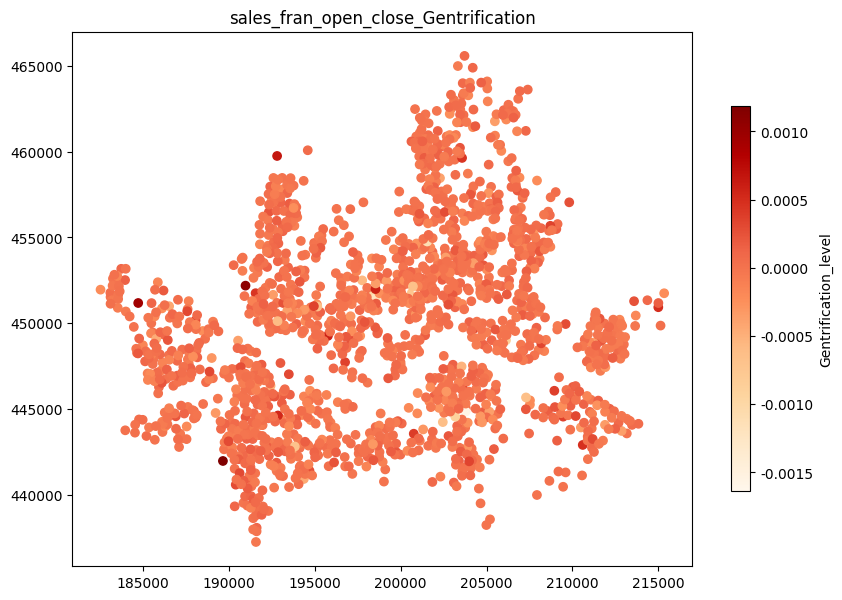

In [74]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
#plt.rcParams['font.family'] = 'NanumBarunGothic'

# 데이터 프레임에서 좌표 데이터를 Point 객체로 변환
lq_change_final['geometry'] = lq_change_final.apply(
    lambda row: Point(row['엑스좌표_값'], row['와이좌표_값']), axis=1
)
geo_data = gpd.GeoDataFrame(lq_change_final, geometry='geometry')

# 데이터 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geo_data.plot(column='LQ 변화량 2019-2022', ax=ax, legend=True, cmap='OrRd',
legend_kwds={'label': "Gentrification_level", 'shrink': 0.5})
plt.title('sales_fran_open_close_Gentrification')
plt.show()

In [75]:
moving_people

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,...,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,청년층_유동인구_수,중년층_유동인구_수,평일_유동인구_수,주말_유동인구_수
4947,20224,U,관광특구,3001496,강남 마이스 관광특구,113561,56267,57295,8423,23526,...,17220,18047,18597,18288,13967,12091,54809,39789,87501,26058
4948,20224,U,관광특구,3001495,잠실 관광특구,4179934,2015767,2164168,490222,895245,...,588228,595830,598401,615406,633869,576473,1892032,1210377,2969593,1210342
4949,20224,U,관광특구,3001494,종로?청계 관광특구,8657826,4693188,3964638,334742,1500979,...,1381468,1386192,1396528,1396973,1047401,776808,3139198,3174579,6833618,1824209
4950,20224,U,관광특구,3001493,동대문패션타운 관광특구,3418870,1617046,1801825,182494,618819,...,540938,546081,547095,512377,377450,374347,1437102,1189746,2667073,751797
4951,20224,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,7629595,3717728,3911867,365427,1301955,...,1241705,1251450,1267499,1240066,864591,661235,3140989,2884134,6103768,1525826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31341,20191,A,골목상권,3110005,세검정,129171,55368,73803,19624,15305,...,18746,18727,18736,18576,17782,17918,31449,41912,93471,35700
31342,20191,A,골목상권,3110004,대신고등학교,495628,226246,269381,94335,57494,...,70158,71562,71577,70647,70556,71236,116874,146307,353836,141792
31343,20191,A,골목상권,3110003,세검정초등학교,706686,310470,396215,128431,82037,...,100429,100067,99815,98912,102760,103921,155842,221079,500006,206681
31344,20191,A,골목상권,3110002,독립문역 1번,540585,246868,293717,96885,65609,...,77283,79044,78826,78583,75041,75508,123011,162598,390037,150549


In [76]:
# 2019년 데이터 필터링
data_2019 = moving_people[moving_people['기준_년분기_코드'].astype(str).str.startswith('2019')]
grouped_2019 = data_2019.groupby('상권_코드_명')['청년층_유동인구_수'].sum().reset_index()
total_2019 = data_2019['청년층_유동인구_수'].sum()
grouped_2019['LQ'] = grouped_2019['청년층_유동인구_수'] / total_2019 if total_2019 != 0 else 0

# 2022년 데이터 필터링
data_2022 = moving_people[moving_people['기준_년분기_코드'].astype(str).str.startswith('2022')]
grouped_2022 = data_2022.groupby('상권_코드_명')['청년층_유동인구_수'].sum().reset_index()
total_2022 = data_2022['청년층_유동인구_수'].sum()
grouped_2022['LQ'] = grouped_2022['청년층_유동인구_수'] / total_2022 if total_2022 != 0 else 0


In [77]:
grouped_2019

,상권_코드_명,청년층_유동인구_수,LQ
0,4.19민주묘지역 2번,609228,0.000302
1,63빌딩,78598,0.000039
2,DMC(디지털미디어시티),1048510,0.000521
3,GS강동자이아파트,928811,0.000461
4,G타워,806705,0.000401
...,...,...,...
1645,후암시장,293573,0.000146
1646,휘문고교사거리,539095,0.000268
1647,흑리단길,300764,0.000149
1648,흑석2치안센터,244784,0.000122


In [78]:
grouped_2022

,상권_코드_명,청년층_유동인구_수,LQ
0,4.19민주묘지역 2번,841419,0.000432
1,63빌딩,79092,0.000041
2,DMC(디지털미디어시티),1019380,0.000523
3,GS강동자이아파트,861674,0.000442
4,G타워,838935,0.000430
...,...,...,...
1645,후암시장,193691,0.000099
1646,휘문고교사거리,505494,0.000259
1647,흑리단길,200031,0.000103
1648,흑석2치안센터,320709,0.000165


In [79]:
# 두 데이터프레임 병합
merged_data = pd.merge(grouped_2019, grouped_2022, on='상권_코드_명', suffixes=('_2019', '_2022'))
# LQ 지수 차이 계산
merged_data['LQ 변화량 2019-2022'] = merged_data['LQ_2022'] - merged_data['LQ_2019']
# 결과 확인
merged_data[['상권_코드_명', 'LQ 변화량 2019-2022']]

,상권_코드_명,LQ 변화량 2019-2022
0,4.19민주묘지역 2번,0.000129
1,63빌딩,0.000002
2,DMC(디지털미디어시티),0.000002
3,GS강동자이아파트,-0.000019
4,G타워,0.000030
...,...,...
1645,후암시장,-0.000046
1646,휘문고교사거리,-0.000008
1647,흑리단길,-0.000047
1648,흑석2치안센터,0.000043


In [80]:
lq_change_final= pd.merge(merged_data, commer_district, on=['상권_코드_명'], how='outer' )
lq_change_final

,상권_코드_명,청년층_유동인구_수_2019,LQ_2019,청년층_유동인구_수_2022,LQ_2022,LQ 변화량 2019-2022,상권_구분_코드,상권_구분_코드_명,상권_코드,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
0,4.19민주묘지역 2번,609228,0.000302,841419,0.000432,0.000129,A,골목상권,3110346,201112,461090,11305,강북구,11305645,우이동,60794
1,63빌딩,78598,0.000039,79092,0.000041,0.000002,D,발달상권,3120150,194670,446691,11560,영등포구,11560540,여의동,40709
2,DMC(디지털미디어시티),1048510,0.000521,1019380,0.000523,0.000002,D,발달상권,3120098,190266,453378,11440,마포구,11440740,상암동,347758
3,GS강동자이아파트,928811,0.000461,861674,0.000442,-0.000019,A,골목상권,3111083,213004,448764,11740,강동구,11740685,길동,81524
4,G타워,806705,0.000401,838935,0.000430,0.000030,A,골목상권,3110722,190905,442315,11530,구로구,11530540,구로3동,84987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,후암시장,293573,0.000146,193691,0.000099,-0.000046,R,전통시장,3130059,197903,450066,11170,용산구,11170510,후암동,33290
1646,휘문고교사거리,539095,0.000268,505494,0.000259,-0.000008,D,발달상권,3120223,205806,444988,11680,강남구,11680610,대치2동,133570
1647,흑리단길,300764,0.000149,200031,0.000103,-0.000047,A,골목상권,3110842,196906,445314,11590,동작구,11590605,흑석동,29278
1648,흑석2치안센터,244784,0.000122,320709,0.000165,0.000043,A,골목상권,3110844,197209,445122,11590,동작구,11590605,흑석동,25007


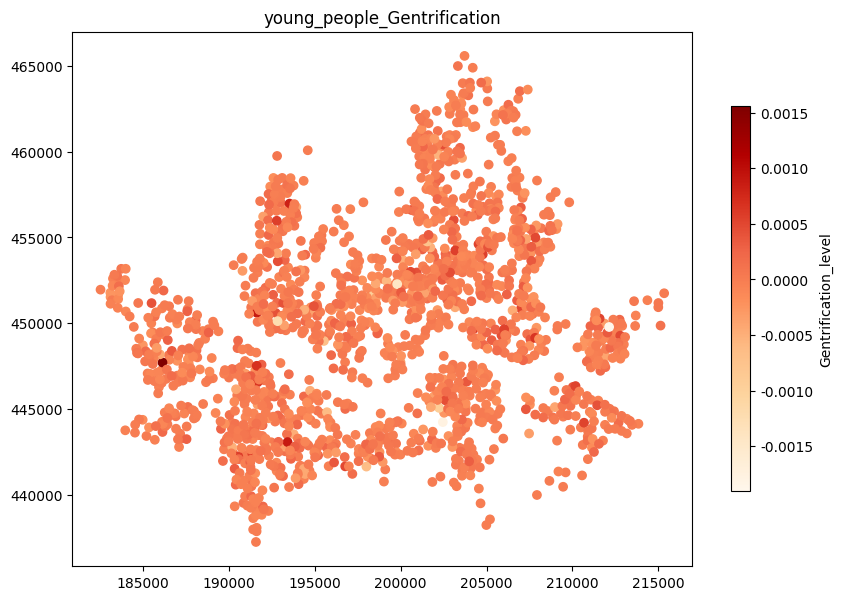

In [81]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
#plt.rcParams['font.family'] = 'NanumBarunGothic'

# 데이터 프레임에서 좌표 데이터를 Point 객체로 변환
lq_change_final['geometry'] = lq_change_final.apply(
    lambda row: Point(row['엑스좌표_값'], row['와이좌표_값']), axis=1
)
geo_data = gpd.GeoDataFrame(lq_change_final, geometry='geometry')

# 데이터 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geo_data.plot(column='LQ 변화량 2019-2022', ax=ax, legend=True, cmap='OrRd',
legend_kwds={'label': "Gentrification_level", 'shrink': 0.5})
plt.title('young_people_Gentrification')
plt.show()

##중년층_유동인구_수_젠트리피케이션

In [82]:
# 2019년 데이터 필터링
data_2019 = moving_people[moving_people['기준_년분기_코드'].astype(str).str.startswith('2019')]
grouped_2019 = data_2019.groupby('상권_코드_명')['중년층_유동인구_수'].sum().reset_index()
total_2019 = data_2019['중년층_유동인구_수'].sum()
grouped_2019['LQ'] = grouped_2019['중년층_유동인구_수'] / total_2019 if total_2019 != 0 else 0

# 2022년 데이터 필터링
data_2022 = moving_people[moving_people['기준_년분기_코드'].astype(str).str.startswith('2022')]
grouped_2022 = data_2022.groupby('상권_코드_명')['중년층_유동인구_수'].sum().reset_index()
total_2022 = data_2022['중년층_유동인구_수'].sum()
grouped_2022['LQ'] = grouped_2022['중년층_유동인구_수'] / total_2022 if total_2022 != 0 else 0


In [83]:
grouped_2019

,상권_코드_명,중년층_유동인구_수,LQ
0,4.19민주묘지역 2번,591499,0.000340
1,63빌딩,75243,0.000043
2,DMC(디지털미디어시티),681610,0.000392
3,GS강동자이아파트,1217951,0.000700
4,G타워,346151,0.000199
...,...,...,...
1645,후암시장,307719,0.000177
1646,휘문고교사거리,397952,0.000229
1647,흑리단길,357727,0.000206
1648,흑석2치안센터,300330,0.000173


In [84]:
grouped_2022

,상권_코드_명,중년층_유동인구_수,LQ
0,4.19민주묘지역 2번,724027,0.000429
1,63빌딩,89190,0.000053
2,DMC(디지털미디어시티),723454,0.000428
3,GS강동자이아파트,1088242,0.000644
4,G타워,377983,0.000224
...,...,...,...
1645,후암시장,216507,0.000128
1646,휘문고교사거리,433817,0.000257
1647,흑리단길,198451,0.000117
1648,흑석2치안센터,407627,0.000241


In [85]:
# 두 데이터프레임 병합
merged_data = pd.merge(grouped_2019, grouped_2022, on='상권_코드_명', suffixes=('_2019', '_2022'))
# LQ 지수 차이 계산
merged_data['LQ 변화량 2019-2022'] = merged_data['LQ_2022'] - merged_data['LQ_2019']
# 결과 확인
merged_data[['상권_코드_명', 'LQ 변화량 2019-2022']]

,상권_코드_명,LQ 변화량 2019-2022
0,4.19민주묘지역 2번,0.000089
1,63빌딩,0.000010
2,DMC(디지털미디어시티),0.000036
3,GS강동자이아파트,-0.000056
4,G타워,0.000025
...,...,...
1645,후암시장,-0.000049
1646,휘문고교사거리,0.000028
1647,흑리단길,-0.000088
1648,흑석2치안센터,0.000069


In [86]:
lq_change_final= pd.merge(merged_data, commer_district, on=['상권_코드_명'], how='outer' )
lq_change_final

,상권_코드_명,중년층_유동인구_수_2019,LQ_2019,중년층_유동인구_수_2022,LQ_2022,LQ 변화량 2019-2022,상권_구분_코드,상권_구분_코드_명,상권_코드,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
0,4.19민주묘지역 2번,591499,0.000340,724027,0.000429,0.000089,A,골목상권,3110346,201112,461090,11305,강북구,11305645,우이동,60794
1,63빌딩,75243,0.000043,89190,0.000053,0.000010,D,발달상권,3120150,194670,446691,11560,영등포구,11560540,여의동,40709
2,DMC(디지털미디어시티),681610,0.000392,723454,0.000428,0.000036,D,발달상권,3120098,190266,453378,11440,마포구,11440740,상암동,347758
3,GS강동자이아파트,1217951,0.000700,1088242,0.000644,-0.000056,A,골목상권,3111083,213004,448764,11740,강동구,11740685,길동,81524
4,G타워,346151,0.000199,377983,0.000224,0.000025,A,골목상권,3110722,190905,442315,11530,구로구,11530540,구로3동,84987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,후암시장,307719,0.000177,216507,0.000128,-0.000049,R,전통시장,3130059,197903,450066,11170,용산구,11170510,후암동,33290
1646,휘문고교사거리,397952,0.000229,433817,0.000257,0.000028,D,발달상권,3120223,205806,444988,11680,강남구,11680610,대치2동,133570
1647,흑리단길,357727,0.000206,198451,0.000117,-0.000088,A,골목상권,3110842,196906,445314,11590,동작구,11590605,흑석동,29278
1648,흑석2치안센터,300330,0.000173,407627,0.000241,0.000069,A,골목상권,3110844,197209,445122,11590,동작구,11590605,흑석동,25007


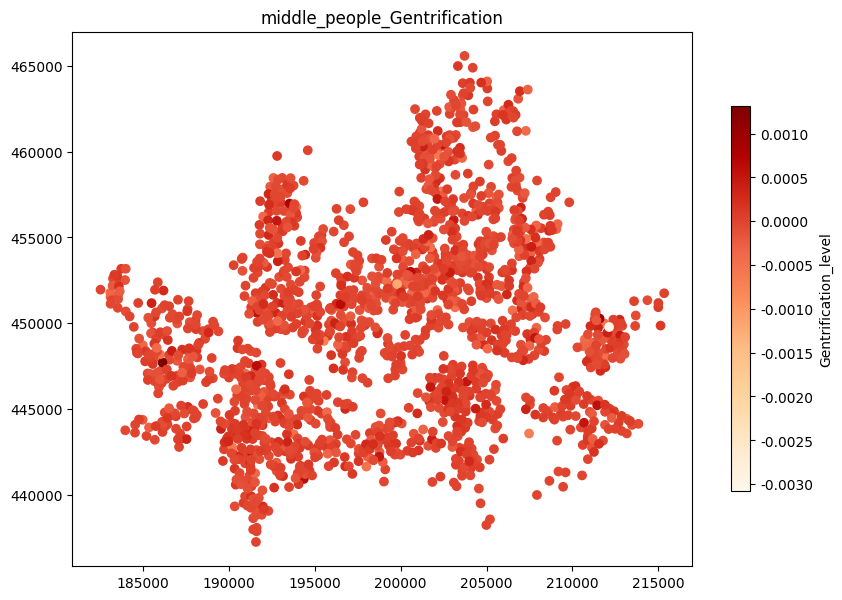

In [87]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
#plt.rcParams['font.family'] = 'NanumBarunGothic'

# 데이터 프레임에서 좌표 데이터를 Point 객체로 변환
lq_change_final['geometry'] = lq_change_final.apply(
    lambda row: Point(row['엑스좌표_값'], row['와이좌표_값']), axis=1
)
geo_data = gpd.GeoDataFrame(lq_change_final, geometry='geometry')

# 데이터 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geo_data.plot(column='LQ 변화량 2019-2022', ax=ax, legend=True, cmap='OrRd',
legend_kwds={'label': "Gentrification_level", 'shrink': 0.5})
plt.title('middle_people_Gentrification')
plt.show()

##노년층_유동인구_수_젠트리피케이션

In [88]:
moving_people.rename(columns={'연령대_60_이상_유동인구_수':'노년층_유동인구_수'},inplace=True)
moving_people.transpose()

,4947,4948,4949,4950,4951,4952,4953,4954,4955,4956,...,31336,31337,31338,31339,31340,31341,31342,31343,31344,31345
기준_년분기_코드,20224,20224,20224,20224,20224,20224,20224,20224,20224,20224,...,20191,20191,20191,20191,20191,20191,20191,20191,20191,20191
상권_구분_코드,U,U,U,U,U,U,R,R,R,R,...,A,A,A,A,A,A,A,A,A,A
상권_구분_코드_명,관광특구,관광특구,관광특구,관광특구,관광특구,관광특구,전통시장,전통시장,전통시장,전통시장,...,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권
상권_코드,3001496,3001495,3001494,3001493,3001492,3001491,3130327,3130326,3130325,3130324,...,3110010,3110009,3110008,3110007,3110006,3110005,3110004,3110003,3110002,3110001
상권_코드_명,강남 마이스 관광특구,잠실 관광특구,종로?청계 관광특구,동대문패션타운 관광특구,명동 남대문 북창동 다동 무교동 관광특구,이태원 관광특구,"평화시장(남평화시장, 제일평화시장, 신평화패션타운)",고덕 골목형상점가,명일전통시장,길동복조리시장,...,평창동서측,자하문터널,배화여자대학교(박노수미술관),사직공원(한국사회과학도서관),부암동주민센터,세검정,대신고등학교,세검정초등학교,독립문역 1번,이북5도청사
총_유동인구_수,113561,4179934,8657826,3418870,7629595,2161642,62192,147922,296251,555117,...,243528,188048,1577188,581385,21363,129171,495628,706686,540585,155680
남성_유동인구_수,56267,2015767,4693188,1617046,3717728,1085212,29346,68449,130055,251495,...,100741,87427,672613,257684,9858,55368,226246,310470,246868,68432
여성_유동인구_수,57295,2164168,3964638,1801825,3911867,1076430,32848,79473,166196,303620,...,142787,100622,904573,323701,11505,73803,269381,396215,293717,87248
연령대_10_유동인구_수,8423,490222,334742,182494,365427,141845,2326,29457,53697,86062,...,36996,26330,290718,121015,3160,19624,94335,128431,96885,27743
연령대_20_유동인구_수,23526,895245,1500979,618819,1301955,531363,9614,13415,30849,61442,...,24990,24437,206254,63921,2691,15305,57494,82037,65609,15216


In [89]:
# 2019년 데이터 필터링
data_2019 = moving_people[moving_people['기준_년분기_코드'].astype(str).str.startswith('2019')]
grouped_2019 = data_2019.groupby('상권_코드_명')['노년층_유동인구_수'].sum().reset_index()
total_2019 = data_2019['노년층_유동인구_수'].sum()
grouped_2019['LQ'] = grouped_2019['노년층_유동인구_수'] / total_2019 if total_2019 != 0 else 0

# 2022년 데이터 필터링
data_2022 = moving_people[moving_people['기준_년분기_코드'].astype(str).str.startswith('2022')]
grouped_2022 = data_2022.groupby('상권_코드_명')['노년층_유동인구_수'].sum().reset_index()
total_2022 = data_2022['노년층_유동인구_수'].sum()
grouped_2022['LQ'] = grouped_2022['노년층_유동인구_수'] / total_2022 if total_2022 != 0 else 0


In [90]:
grouped_2019

,상권_코드_명,노년층_유동인구_수,LQ
0,4.19민주묘지역 2번,632704,0.000480
1,63빌딩,58188,0.000044
2,DMC(디지털미디어시티),204011,0.000155
3,GS강동자이아파트,1069647,0.000812
4,G타워,126915,0.000096
...,...,...,...
1645,후암시장,251346,0.000191
1646,휘문고교사거리,160231,0.000122
1647,흑리단길,317071,0.000241
1648,흑석2치안센터,302957,0.000230


In [91]:
grouped_2022

,상권_코드_명,노년층_유동인구_수,LQ
0,4.19민주묘지역 2번,740807,0.000636
1,63빌딩,48075,0.000041
2,DMC(디지털미디어시티),184799,0.000159
3,GS강동자이아파트,932670,0.000801
4,G타워,125787,0.000108
...,...,...,...
1645,후암시장,158957,0.000136
1646,휘문고교사거리,134347,0.000115
1647,흑리단길,165195,0.000142
1648,흑석2치안센터,362023,0.000311


In [92]:
# 두 데이터프레임 병합
merged_data = pd.merge(grouped_2019, grouped_2022, on='상권_코드_명', suffixes=('_2019', '_2022'))
# LQ 지수 차이 계산
merged_data['LQ 변화량 2019-2022'] = merged_data['LQ_2022'] - merged_data['LQ_2019']
# 결과 확인
merged_data[['상권_코드_명', 'LQ 변화량 2019-2022']]

,상권_코드_명,LQ 변화량 2019-2022
0,4.19민주묘지역 2번,0.000156
1,63빌딩,-0.000003
2,DMC(디지털미디어시티),0.000004
3,GS강동자이아파트,-0.000011
4,G타워,0.000012
...,...,...
1645,후암시장,-0.000054
1646,휘문고교사거리,-0.000006
1647,흑리단길,-0.000099
1648,흑석2치안센터,0.000081


In [93]:
lq_change_final= pd.merge(merged_data, commer_district, on=['상권_코드_명'], how='outer' )
lq_change_final

,상권_코드_명,노년층_유동인구_수_2019,LQ_2019,노년층_유동인구_수_2022,LQ_2022,LQ 변화량 2019-2022,상권_구분_코드,상권_구분_코드_명,상권_코드,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
0,4.19민주묘지역 2번,632704,0.000480,740807,0.000636,0.000156,A,골목상권,3110346,201112,461090,11305,강북구,11305645,우이동,60794
1,63빌딩,58188,0.000044,48075,0.000041,-0.000003,D,발달상권,3120150,194670,446691,11560,영등포구,11560540,여의동,40709
2,DMC(디지털미디어시티),204011,0.000155,184799,0.000159,0.000004,D,발달상권,3120098,190266,453378,11440,마포구,11440740,상암동,347758
3,GS강동자이아파트,1069647,0.000812,932670,0.000801,-0.000011,A,골목상권,3111083,213004,448764,11740,강동구,11740685,길동,81524
4,G타워,126915,0.000096,125787,0.000108,0.000012,A,골목상권,3110722,190905,442315,11530,구로구,11530540,구로3동,84987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,후암시장,251346,0.000191,158957,0.000136,-0.000054,R,전통시장,3130059,197903,450066,11170,용산구,11170510,후암동,33290
1646,휘문고교사거리,160231,0.000122,134347,0.000115,-0.000006,D,발달상권,3120223,205806,444988,11680,강남구,11680610,대치2동,133570
1647,흑리단길,317071,0.000241,165195,0.000142,-0.000099,A,골목상권,3110842,196906,445314,11590,동작구,11590605,흑석동,29278
1648,흑석2치안센터,302957,0.000230,362023,0.000311,0.000081,A,골목상권,3110844,197209,445122,11590,동작구,11590605,흑석동,25007


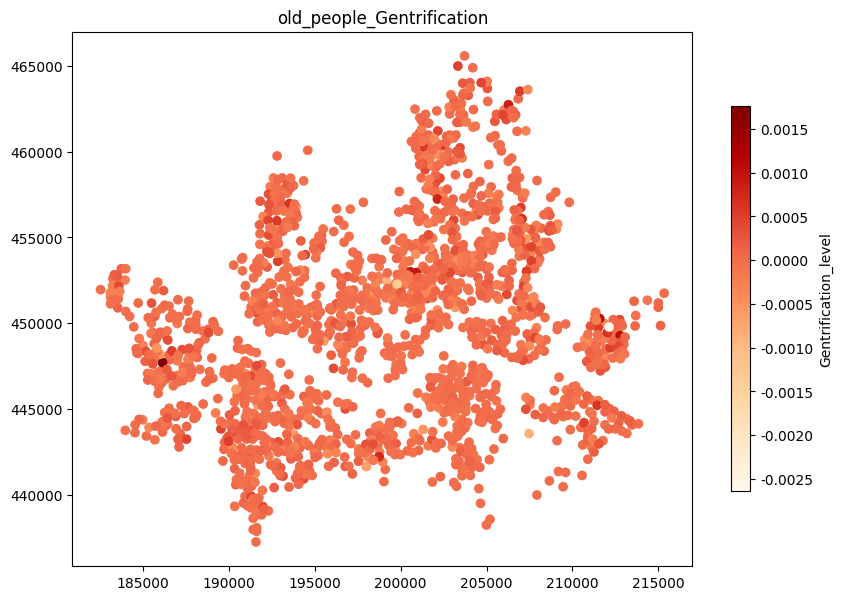

In [94]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
#plt.rcParams['font.family'] = 'NanumBarunGothic'

# 데이터 프레임에서 좌표 데이터를 Point 객체로 변환
lq_change_final['geometry'] = lq_change_final.apply(
    lambda row: Point(row['엑스좌표_값'], row['와이좌표_값']), axis=1
)
geo_data = gpd.GeoDataFrame(lq_change_final, geometry='geometry')

# 데이터 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geo_data.plot(column='LQ 변화량 2019-2022', ax=ax, legend=True, cmap='OrRd',
legend_kwds={'label': "Gentrification_level", 'shrink': 0.5})
plt.title('old_people_Gentrification')
plt.show()

In [99]:
from google.colab import files

# 가정: commercial_district는 이미 존재하는 데이터프레임
# 예를 들어, 다음과 같이 생성할 수 있습니다:
# commercial_district = pd.DataFrame({
#     'Column1': [1, 2, 3],
#     'Column2': ['A', 'B', 'C']
# })

# 데이터프레임을 CSV 파일로 저장
commer_district.to_csv('commer_district.csv', index=False)

# 생성된 CSV 파일을 사용자가 다운로드할 수 있도록 제공
files.download('commer_district.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [95]:
# 2019년 데이터 필터링
data_2019 = moving_people[moving_people['기준_년분기_코드'].astype(str).str.startswith('2019')]
grouped_2019 = data_2019.groupby('상권_코드_명')['노년층_유동인구_수'].sum().reset_index()
total_2019 = data_2019['노년층_유동인구_수'].sum()
grouped_2019['LQ'] = grouped_2019['년노층_유동인구_수'] / total_2019 if total_2019 != 0 else 0

# 2022년 데이터 필터링
data_2022 = moving_people[moving_people['기준_년분기_코드'].astype(str).str.startswith('2022')]
grouped_2022 = data_2022.groupby('상권_코드_명')['노년층_유동인구_수'].sum().reset_index()
total_2022 = data_2022['노년층_유동인구_수'].sum()
grouped_2022['LQ'] = grouped_2022['노년층_유동인구_수'] / total_2022 if total_2022 != 0 else 0

KeyError: '년노층_유동인구_수'

In [ ]:
import geopandas as gpd

# 서울시 경계 데이터 로드
seoul_boundary = gpd.read_file('/content/drive/MyDrive/2024-1 캡스톤디자인/ctprvn.shp')

# 좌표계 확인
print("서울시 경계 데이터 좌표계:", seoul_boundary.crs)
print("젠트리피케이션 데이터 좌표계:", geo_data.crs)

# 좌표계 통일
# 예를 들어, 모든 데이터를 EPSG:4326 (WGS84)로 변환
seoul_boundary = seoul_boundary.to_crs(epsg=4326)
geo_data = geo_data.to_crs(epsg=4326)

# 데이터 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
seoul_boundary.plot(ax=ax, color='none', edgecolor='black')  # 서울시 경계
geo_data.plot(column='젠트리피케이션지수', ax=ax, cmap='OrRd', legend=True)  # 젠트리피케이션 지수
plt.show()

멈춰!!!!

In [ ]:
# 데이터프레임이 이미 코랩에 로드되어 있다고 가정
# 예를 들어 grouped_2019, grouped_2020, grouped_2021, grouped_2022 변수가 정의되어 있다고 가정합니다.

# 상권_코드_명 별로 각 연도의 LQ 합계를 계산
lq_totals = {}
years = [2019, 2020, 2021, 2022]

for year in years:
    df = eval(f'grouped_{year}')  # 연도별 데이터프레임을 사용
    lq_totals[year] = df.groupby('상권_코드_명')['LQ'].sum()

# 이전 연도와 현재 연도의 LQ 변화량을 계산하여 데이터프레임으로 만듦
lq_change_dataframes = []
for year in range(2020, 2023):
    previous_year = year - 1
    lq_change = lq_totals[year] - lq_totals[previous_year]
    lq_change = lq_change.reset_index()
    lq_change.columns = ['상권_코드_명', f'LQ 변화량 {previous_year}-{year}']
    lq_change_dataframes.append(lq_change)

# 모든 연도의 LQ 변화량을 하나의 데이터프레임으로 병합
lq_change_final = lq_change_dataframes[0]
for lq_change_df in lq_change_dataframes[1:]:
    lq_change_final = lq_change_final.merge(lq_change_df, on='상권_코드_명', how='outer')

# 결과 출력
lq_change_final

In [ ]:
lq_change_final['젠트리피케이션지수'] = lq_change_final.iloc[:, 1:].sum(axis=1)

In [ ]:
lq_change_final= pd.merge(lq_change_final, commer_district, on=['상권_코드_명'], how='outer' )
lq_change_final

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
#plt.rcParams['font.family'] = 'NanumBarunGothic'

# 데이터 프레임에서 좌표 데이터를 Point 객체로 변환
lq_change_final['geometry'] = lq_change_final.apply(
    lambda row: Point(row['엑스좌표_값'], row['와이좌표_값']), axis=1
)
geo_data = gpd.GeoDataFrame(lq_change_final, geometry='geometry')

# 데이터 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geo_data.plot(column='젠트리피케이션지수', ax=ax, legend=True, cmap='OrRd',
legend_kwds={'label': "Gentrification_level", 'shrink': 0.5})
plt.title('food_open_close_Gentrification')
plt.show()


In [ ]:
# 두 데이터프레임 병합
merged_data = pd.merge(grouped_2019, grouped_2022, on='상권_코드_명', suffixes=('_2019', '_2022'))
# LQ 지수 차이 계산
merged_data['LQ 변화량 2019-2022'] = merged_data['LQ_2022'] - merged_data['LQ_2019']
# 결과 확인
merged_data[['상권_코드_명', 'LQ 변화량 2019-2022']]

In [ ]:
import geopandas as gpd

# 서울시 경계 데이터 로드
seoul_boundary = gpd.read_file('/content/drive/MyDrive/2024-1 캡스톤디자인/ctprvn.shp')

# 좌표계 확인
print("서울시 경계 데이터 좌표계:", seoul_boundary.crs)
print("젠트리피케이션 데이터 좌표계:", geo_data.crs)

# 좌표계 통일
# 예를 들어, 모든 데이터를 EPSG:4326 (WGS84)로 변환
seoul_boundary = seoul_boundary.to_crs(epsg=4326)
geo_data = geo_data.to_crs(epsg=4326)

# 데이터 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
seoul_boundary.plot(ax=ax, color='none', edgecolor='black')  # 서울시 경계
geo_data.plot(column='젠트리피케이션지수', ax=ax, cmap='OrRd', legend=True)  # 젠트리피케이션 지수
plt.show()

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 서울시 행정구역 경계 데이터 로드
seoul_boundary = gpd.read_file('/content/drive/MyDrive/2024-1 캡스톤디자인/ctprvn.shp')  # 파일 경로 수정 필요

# 데이터 프레임에서 좌표 데이터를 Point 객체로 변환
lq_change_final['geometry'] = lq_change_final.apply(
    lambda row: Point(row['엑스좌표_값'], row['와이좌표_값']), axis=1
)
geo_data = gpd.GeoDataFrame(lq_change_final, geometry='geometry', crs=seoul_boundary.crs)

# 데이터 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
seoul_boundary.plot(ax=ax, color='none', edgecolor='black')  # 경계선을 검은색으로 표시
geo_data.plot(column='젠트리피케이션지수', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Gentrification_level", 'shrink': 0.5})
plt.title('food_open_close_Gentrification')
plt.show()

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'


# 좌표 변환 함수 (위도, 경도가 아닌 경우 사용)
# from pyproj import Transformer
# transformer = Transformer.from_crs("epsg:5179", "epsg:4326", always_xy=True)
# def transform_coordinates(x, y):
#     lon, lat = transformer.transform(x, y)
#     return lat, lon

# 좌표 데이터를 Point 객체로 변환
data['geometry'] = data.apply(lambda row: Point(row['엑스좌표_값'], row['와이좌표_값']), axis=1)
geo_data = gpd.GeoDataFrame(data, geometry='geometry')

# 데이터 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geo_data.plot(column='젠트리피케이션 지수', ax=ax, legend=True, cmap='OrRd')
plt.show()


In [ ]:
!pip install folium geopandas matplotlib

In [ ]:
import folium
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install folium

In [ ]:
import pandas as pd
import folium
from pyproj import Proj, transform

# UTM-K (GRS80)에서 WGS84로 변환을 위한 설정
proj_utm = Proj('epsg:5179')  # 한국 중부 직사각형 좌표계
proj_wgs = Proj('epsg:4326')  # GPS 사용 좌표계

def transform_coordinates(x, y):
    lon, lat = transform(proj_utm, proj_wgs, x, y)
    return lat, lon

In [ ]:
import pandas as pd
import folium
from pyproj import Proj, transform

# UTM-K (GRS80)에서 WGS84로 변환을 위한 설정
proj_utm = Proj('epsg:5179')  # 한국 중부 직사각형 좌표계
proj_wgs = Proj('epsg:4326')  # GPS 사용 좌표계

def transform_coordinates(x, y):
    lon, lat = transform(proj_utm, proj_wgs, x, y)
    return lat, lon
# 서울 중심부를 중심으로 하는 지도 생성
map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)


# 지도에 데이터 표시
for idx, row in lq_change_final.iterrows():
    if not pd.isna(row['엑스좌표_값']) and not pd.isna(row['와이좌표_값']):
        lat, lon = transform_coordinates(row['엑스좌표_값'], row['와이좌표_값'])
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"LQ 변화량 2021-2022: {row['LQ 변화량 2021-2022']}"
        ).add_to(map)

# 지도 표시
map


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import Transformer

# 서울시 행정 경계 데이터 로드
seoul_boundary = gpd.read_file('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')  # 경계 데이터 파일 경로 수정 필요
from shapely.geometry import Point  # Point 클래스 임포트

# Transformer를 사용하여 좌표 변환
transformer = Transformer.from_crs("epsg:5179", "epsg:4326", always_xy=True)

def transform_coordinates(x, y):
    lon, lat = transformer.transform(x, y)
    return lat, lon

# 서울 중심부를 중심으로 하는 지도 생성
map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 지도에 데이터 표시
for idx, row in lq_change_final.iterrows():
    if not pd.isna(row['엑스좌표_값']) and not pd.isna(row['와이좌표_값']):
        lat, lon = transform_coordinates(row['엑스좌표_값'], row['와이좌표_값'])
        # Point 객체 생성
        point = Point(lon, lat)  # 좌표 순서 주의 (경도, 위도)
        # 지도에 마커 추가
        folium.Marker(
            location=[lat, lon],
            popup=f"LQ 변화량 2021-2022: {row['LQ 변화량 2021-2022']}",
            icon=folium.Icon(color='blue')
        ).add_to(map)

# 지도 표시
map

In [ ]:
import pandas as pd
import folium
from pyproj import Proj, transform

# UTM-K (GRS80)에서 WGS84로 변환을 위한 설정
proj_utm = Proj('epsg:5179')  # 한국 중부 직사각형 좌표계
proj_wgs = Proj('epsg:4326')  # GPS 사용 좌표계

def transform_coordinates(x, y):
    lon, lat = transform(proj_utm, proj_wgs, x, y)
    return lat, lon

# 서울 중심부를 중심으로 하는 지도 생성
map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 색상을 정의하기 위한 함수
def get_color(gentrification_index):
    if pd.isna(gentrification_index):
        return '#808080'  # 데이터가 없는 경우 회색
    elif gentrification_index < 0.0025:
        return '#ffffcc'
    elif gentrification_index < 0.005:
        return '#a1dab4'
    elif gentrification_index < 0.0075:
        return '#41b6c4'
    elif gentrification_index < 0.01:
        return '#2c7fb8'
    else:
        return '#253494'

# 지도에 데이터 표시
for idx, row in lq_change_final.iterrows():
    if not pd.isna(row['엑스좌표_값']) and not pd.isna(row['와이좌표_값']):
        lat, lon = transform_coordinates(row['엑스좌표_값'], row['와이좌표_값'])
        color = get_color(row['젠트리피케이션지수'])
        folium.CircleMarker(
            location=[lat, lon],
            radius=7,  # 마커 크기 증가
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.75,  # 투명도 조정
            popup=f"LQ 변화량 2021-2022: {row['LQ 변화량 2021-2022']}\n젠트리피케이션 지수: {row['젠트리피케이션지수']}"
        ).add_to(map)

# 지도 표시
map

In [ ]:
# 젠트리피케이션 지수의 평균 및 최대값 계산
mean_gentrification_index = lq_change_final['젠트리피케이션 지수'].mean()
max_gentrification_index = lq_change_final['젠트리피케이션 지수'].max()

print(f"젠트리피케이션 지수의 평균값: {mean_gentrification_index}")
print(f"젠트리피케이션 지수의 최대값: {max_gentrification_index}")


In [ ]:
# food_fran_somae 데이터프레임을 이용하여 소매업에 대한 LQ를 계산하는 코드입니다.

# 서울 전체의 소매업 개폐업 점포 수의 총합(A)를 구합니다.
total_retail_open_close_A = food_fran_somae['소매업_개폐업_점포_수'].sum()

# '상권_코드_명'으로 그룹화하여 각 상권별 소매업 개폐업 점포 수(B)를 계산합니다.
grouped_retail = food_fran_somae.groupby('상권_코드_명').agg({
    '소매업_개폐업_점포_수': 'sum'
}).rename(columns={'소매업_개폐업_점포_수': 'B'})

# 각 상권별 LQ 지수를 계산하고 결과를 저장합니다.
# LQ는 상권별 소매업 점포 수의 비율을 전체 소매업 점포 수에서 차지하는 비율로 나눈 값입니다.
grouped_retail['LQ_소매업_개폐업_수'] = grouped_retail['B'] / total_retail_open_close_A

# 결과를 출력합니다.
grouped_retail